# **Loan Default Prediction**

## **Problem Definition**

### **The Context:**

Many home-owners seek loans secured by the current equity in their property. These loans, known as home-equity loans, provide income to banks through the interest on the loans paid by borrowers. The ability to predict whether a borrower will default on their loan is of utmost importance in the field of finance. Predicting loan defaults accurately can help banks and other financial institutions manage their credit risks effectively, prevent losses, and ensure the stability of the financial system.When borrowers default on loans, banks lose money. 
 
When considering loan applications, banks examine various characteristics of potential borrowers. Developing and implementing classification models with high success can help to reduce any human error or bias in the loan approval process. Given a dataset of historical loan applications and their outcomes (defaulted or not), our task is to develop a predictive model that can accurately classify new loan applications as either likely to default or not. 
 
### **The objective:**

The objective of this project is to develop a machine learning model that can accurately predict loan defaults. The model should be able to identify the most important factors that contribute to loan defaults and provide insights into the risk profile of loan applicants.

### **The key questions:**

- What are the key factors that contribute to loan defaults?
- Can we develop a model that can accurately predict loan defaults?
- What is the most suitable machine learning algorithm for this problem?
- How can we evaluate the performance of the predictive model?
- How can we use the model to gain insights into the risk profile of loan applicants?

### **The problem formulation**:

Given a dataset of historical loan applications and their outcomes, our task is to develop a predictive model that can accurately classify new loan applications as either likely to default or not. The model should take into account various factors such as the loan value, amount due on existing mortgage, the current value of the property, the reason for the loan, applicant's job and years at present job, derogatory claims against the applicant, other credit lines, delinquency, recent credit inquiries and debt-to-income ratio. The model should be trained on a subset of the available data and evaluated on a test set to ensure that it generalizes well to new data. The performance of the model will be evaluated using recall and F1 score. The most important features identified by the model will be used to gain insights into the risk profile of loan applicants.

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and Data**

In [2]:
# Libraries for data manipulation and data visualization
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Classification algorithms to use
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import recall_score, f1_score, accuracy_score, fbeta_score, precision_score 
from sklearn import metrics

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

In [3]:
# Read the dataset
data = pd.read_csv("hmeq.csv")

In [4]:
# Create a copy of the dataset
df = data.copy()

In [5]:
# View first 5 rows of the dataset
df.head()

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN

In [6]:
# View last 5 rows of the dataset
df.tail()

BAD   LOAN  MORTDUE    VALUE   REASON    JOB   YOJ  DEROG  DELINQ  \
5955    0  88900  57264.0  90185.0  DebtCon  Other  16.0    0.0     0.0   
5956    0  89000  54576.0  92937.0  DebtCon  Other  16.0    0.0     0.0   
5957    0  89200  54045.0  92924.0  DebtCon  Other  15.0    0.0     0.0   
5958    0  89800  50370.0  91861.0  DebtCon  Other  14.0    0.0     0.0   
5959    0  89900  48811.0  88934.0  DebtCon  Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
5955  221.808718   0.0  16.0  36.112347  
5956  208.692070   0.0  15.0  35.859971  
5957  212.279697   0.0  15.0  35.556590  
5958  213.892709   0.0  16.0  34.340882  
5959  219.601002   0.0  16.0  34.571519

In [7]:
# View a random sample of the dataset
df.sample(5)

BAD   LOAN  MORTDUE     VALUE   REASON      JOB   YOJ  DEROG  DELINQ  \
4507    0  23500  62742.0  111921.0  DebtCon  ProfExe  15.0    0.0     3.0   
577     1   7500  57800.0  109600.0  DebtCon      Mgr   4.0    0.0     1.0   
5905    0  63900  62200.0  140030.0  HomeImp   Office  10.0    0.0     1.0   
881     0   8800      NaN   74928.0      NaN      NaN   NaN    NaN     NaN   
383     0   6400  81116.0   86148.0  HomeImp  ProfExe   8.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
4507  282.976016   0.0  36.0  27.148205  
577   124.133333   1.0  18.0        NaN  
5905  126.800000   0.0  12.0        NaN  
881          NaN   NaN   NaN  23.988913  
383   262.175426   0.0  11.0  42.068268

In [8]:
# Check the shape of the dataset
df.shape

(5960, 13)

**The dataset contains 5960 rows and 13 columns.**

In [9]:
# Check the datatypes and null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Observations:**

* BAD and LOAN are integer type variables.
* MORTDUE, VALUE, YOJ, DEROG, DELINQ, CLAGE, NINQ, CLNO, DEBTINC are all float type variables.
* Both REASON and JOB are object type variables.

* There are null values in every field with the exception of BAD and LOAN, which indicate the default status and the amount of the loan approved.

In [10]:
# Determine the percent of each field that is null
df.isnull().mean()*100

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

**NULL Values** 
- The highest percentage of missing values are in the DEBTINC field. More than 20% of the debt-to-income ratio values are missing from the dataset.
- Almost 12% of the data is missing in the DEROG field which gives the number of major derogatory reports.
- Almost 10% of the data is missing in the DELINQ field which gives the number of delinquent credit lines.
- Almost 9% of the data is missing from the MORTDUE field which gives the amount due on the existing mortgage, the YOJ field which gives the years at present job, and the NINQ field which gives the number of recent credit inquiries.

In [11]:
df.duplicated().sum()

0

**The dataset does not contain any duplicate values.**

## Summary Statistics

In [12]:
# View summary statistics for dataset
df.describe().T

count           mean           std          min           25%  \
BAD      5960.0       0.199497      0.399656     0.000000      0.000000   
LOAN     5960.0   18607.969799  11207.480417  1100.000000  11100.000000   
MORTDUE  5442.0   73760.817200  44457.609458  2063.000000  46276.000000   
VALUE    5848.0  101776.048741  57385.775334  8000.000000  66075.500000   
YOJ      5445.0       8.922268      7.573982     0.000000      3.000000   
DEROG    5252.0       0.254570      0.846047     0.000000      0.000000   
DELINQ   5380.0       0.449442      1.127266     0.000000      0.000000   
CLAGE    5652.0     179.766275     85.810092     0.000000    115.116702   
NINQ     5450.0       1.186055      1.728675     0.000000      0.000000   
CLNO     5738.0      21.296096     10.138933     0.000000     15.000000   
DEBTINC  4693.0      33.779915      8.601746     0.524499     29.140031   

                  50%            75%            max  
BAD          0.000000       0.000000       1.000000  
LOAN     16300.000000   23300.000000   89900.000000  
MORTDUE  65019.000000   91488.000000  399550.000000  
VALUE    89235.500000  119824.250000  855909.000000  
YOJ          7.000000      13.000000      41.000000  
DEROG        0.000000       0.000000      10.000000  
DELINQ       0.000000       0.000000      15.000000  
CLAGE      173.466667     231.562278    1168.233561  
NINQ         1.000000       2.000000      17.000000  
CLNO        20.000000      26.000000      71.000000  
DEBTINC     34.818262      39.003141     203.312149

**Observations:**
- For the entire data set, the loan default rate is 19.9%.
- The mean loan amount is \\$18,608 with 75% of the loans being \$23,300 or less.
- The amount due on existing mortgage is highly variable with a mean of \\$73,761 and a max of \$399,550.
- The current value of property is also highly variable and averages \\$101,776 with a max of \$855,909.
- The years at present job ranges from 0 to 41 years with a mean of 8.9 years.
- At least 75% of the loans are to individuals with zero major derogatory reports, yet the max number of major derogatory reports is 10.
- The average age of the oldest credit line is 180 months with a max of 1168 months.
- The average number of recent credit inquiries is 21.3 with a median of 20 and a max of 71.
- The average debt-to-income ratio is 33.8% with a max of 203%. This could be an error or a very bad loan.

In [13]:
# Create a new column and assign value based on whether or not the row contains any missing values
df['full'] = np.where(df.isnull().any(axis=1),'Null','Complete')

In [100]:
df.groupby('full').count()

BAD  LOAN  MORTDUE  VALUE  REASON   JOB   YOJ  DEROG  DELINQ  \
full                                                                      
Complete  3364  3364     3364   3364    3364  3364  3364   3364    3364   
Null      2596  2596     2078   2484    2344  2317  2081   1888    2016   

          CLAGE  NINQ  CLNO  DEBTINC  
full                                  
Complete   3364  3364  3364     3364  
Null       2288  2086  2374     1329

In [14]:
# Compare statistics of rows containing complete data with rows containing missing values
df.groupby(['full','BAD']).mean().T

full          Complete                         Null              
BAD                  0              1             0             1
LOAN      19260.607050   18069.666667  18610.779145  16534.870641
MORTDUE   76483.152742   73864.490000  70916.074618  67773.082465
VALUE    107950.247389  102917.013333  92945.535135  96357.476161
YOJ           9.263055       7.550000      8.891408      8.201760
DEROG         0.100849       0.616667      0.228361      0.741895
DELINQ        0.209204       0.990000      0.336947      1.317013
CLAGE       183.943307     150.868206    193.348275    149.939373
NINQ          0.976501       1.660000      1.168239      1.828010
CLNO         22.092037      22.340000     19.773082     20.806220
DEBTINC      33.595725      39.647852     32.396916     38.629761

**Observations:**
- The rows containing null values have a loan default rate of **34.2%** while the rows with complete data have a loan default rate of only 8.9%.
- The rows containing null values show an average of 0.447 major derogatory reports versus those with complete data whose average is only 0.147.
- The rows containing null values show an average of 0.734 delinquent credit lines versus those with complete data whose average is only 0.279.
- The rows containing null values show an average of 1.43 recent credit inquiries versus those with complete data whose average is only 1.04.
- Other values are similar between the two groups.
- Rows containing missing values contain a much higher rate of loan defaults. This could be for several reasons including errors in ETL, errors in data collection, withholding of information by potential applicants.
- Handling of missing data must be done with care to avoid losing information contained within these rows.

## **Exploratory Data Analysis (EDA) and Visualization**

EDA (Exploratory Data Analysis) is a crucial step in any data analysis or data science project. The main importance of EDA is to gain a deeper understanding of the data and identify patterns, trends, and relationships among variables. Some of the key reasons why EDA is important are:

- Identify data quality issues: EDA helps to identify missing values, outliers, inconsistencies, and other data quality issues that can affect the accuracy of the analysis. 

- Explore variable distributions: EDA helps to visualize and understand the distributions of variables through univariate analysis, which is essential for identifying trends and patterns and detecting outliers.

- Identify relationships between variables: EDA helps to explore the relationships between different variables through bivariate and multivariate analysis. This is important for identifying patterns, trends, and correlations that can be used to build predictive models or to gain insights into the data.

- Determine appropriate data preprocessing steps: EDA helps to determine appropriate data preprocessing steps such as scaling, feature engineering, treatment of outliers, and imputation of missing values.

- Communicate findings: EDA provides a way to communicate findings to stakeholders in a clear and understandable way, through visualizations, summary statistics, and descriptive narratives.

In summary, EDA is a critical step as it helps to identify data quality issues, explore variable distributions, identify relationships between variables, determine appropriate data preprocessing steps, and communicate findings to stakeholders.

**Leading Questions**:
1. What is the range of values for the loan amount variable "LOAN"?
2. How does the distribution of years at present job "YOJ" vary across the dataset?
3. How many unique categories are there in the REASON variable?
4. What is the most common category in the JOB variable?
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
7. Is there a correlation between the value of the property and the loan default rate?
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

### **Univariate Analysis**


In [15]:
# Make a list of all categorical variables
cat_col=list(df.select_dtypes('object').columns)

# Make a list of all numerical variables
num_col=list(df.select_dtypes(['int64','float64']).columns)

In [16]:
# Check percentages of unique values in each categorical variable
for column in cat_col:
    print(df[column].value_counts(normalize=True),'\n')

DebtCon    0.688157
HomeImp    0.311843
Name: REASON, dtype: float64 

Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: JOB, dtype: float64 

Complete    0.56443
Null        0.43557
Name: full, dtype: float64 



**Observations:**
- There are only two types of loans represented in the dataset: debt consolidation and home improvement.
- Roughly 69% of loans were made for debt consolidation and 31% for home improvement.
- There are six different job types represented in the dataset.
- The largest portion of applicants (42%) show a job type of "Other."
- The second largest portion of applicants (22%) show a job type of "ProfExe," followed by "Office" at 16.7% and "Mgr" at 13.5%.
- Job types of "Self" and "Sales" are only 3.4% and 1.9% of the data respectively.
- In the dataset, 43.6% of rows contain one or more variable with missing values.

### Examine categorical variables.

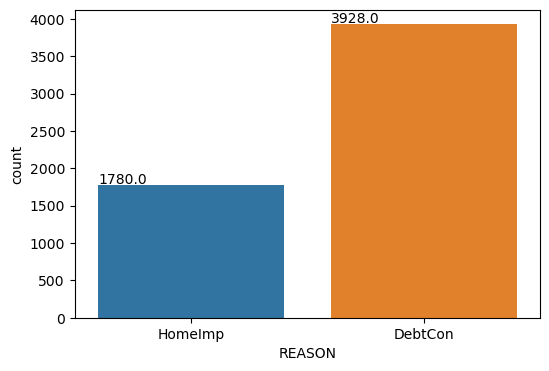

In [17]:
# View breakdown by reason
plt.figure(figsize = (6, 4))
ax = sns.countplot(x = 'REASON', data = df)

# Annotating the exact count on the top of the bar for each category 
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+20))

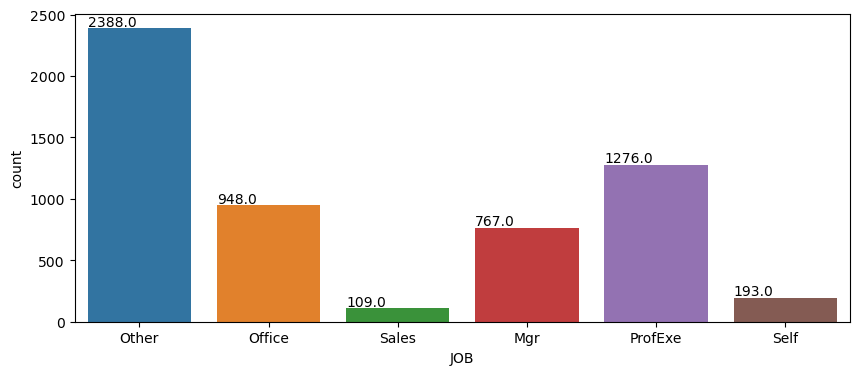

In [18]:
# View breakdown by job type
plt.figure(figsize = (10, 4))
ax = sns.countplot(x = 'JOB', data = df)

# Annotating the exact count on the top of the bar for each category 
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+20))

**Observations:**
- Visual representations of reason for loan and job type reinforce understanding from the normalized value counts.
- Sales jobs and self-employed make up the smallest portion of the loan applicants.
- Jobs classfied as Other make up the largest portion of loan applicants, followed by Professional/Executive.

### Examine numerical variables

Histograms and boxplots can help us visualize numerical variables. These types of plots allow us to gain a better understanding of the distribution of values as well as any extreme or outlier values.

LOAN
Skew: 2.02


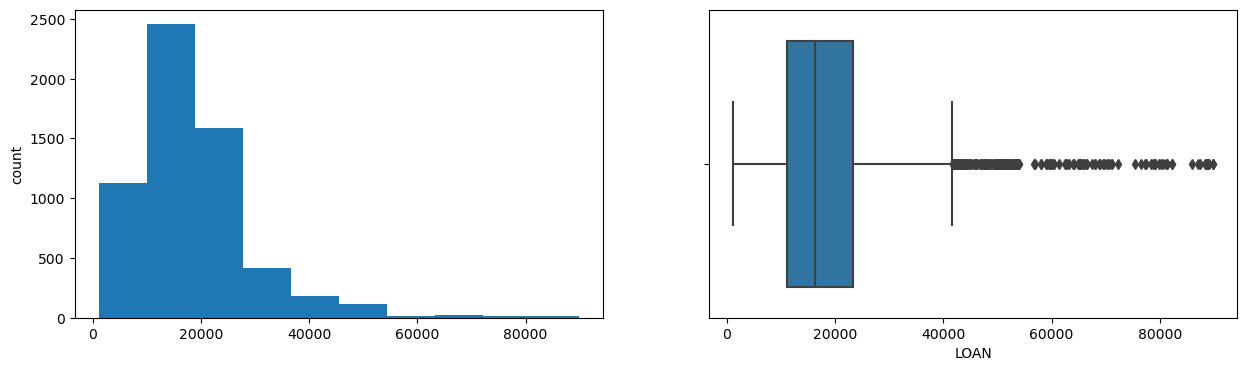

MORTDUE
Skew: 1.81


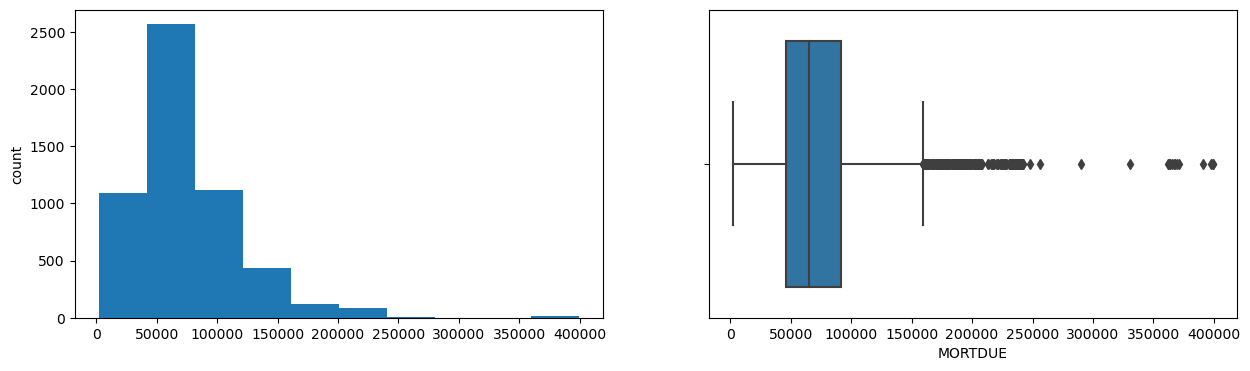

VALUE
Skew: 3.05


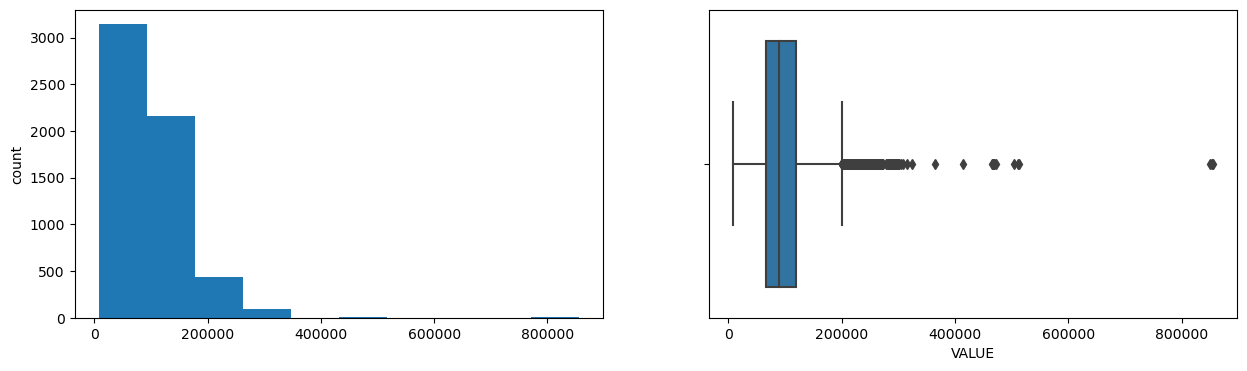

YOJ
Skew: 0.99


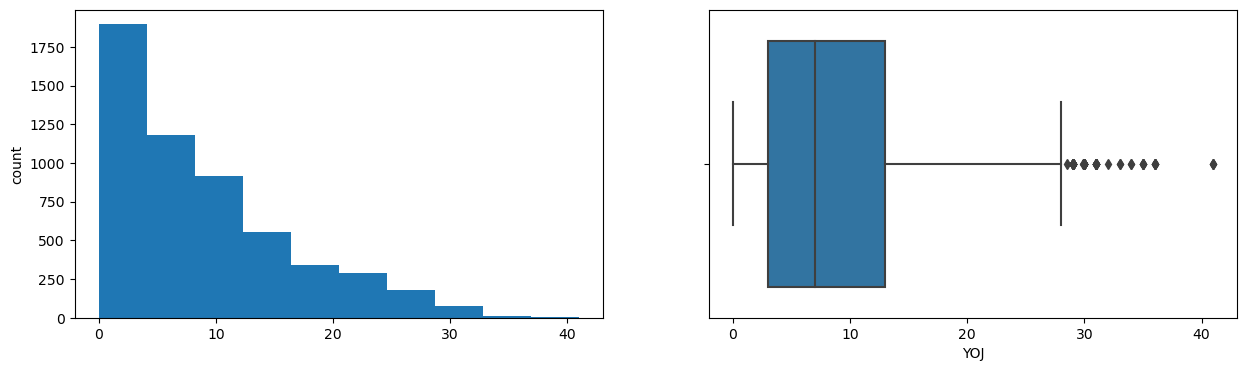

DEROG
Skew: 5.32


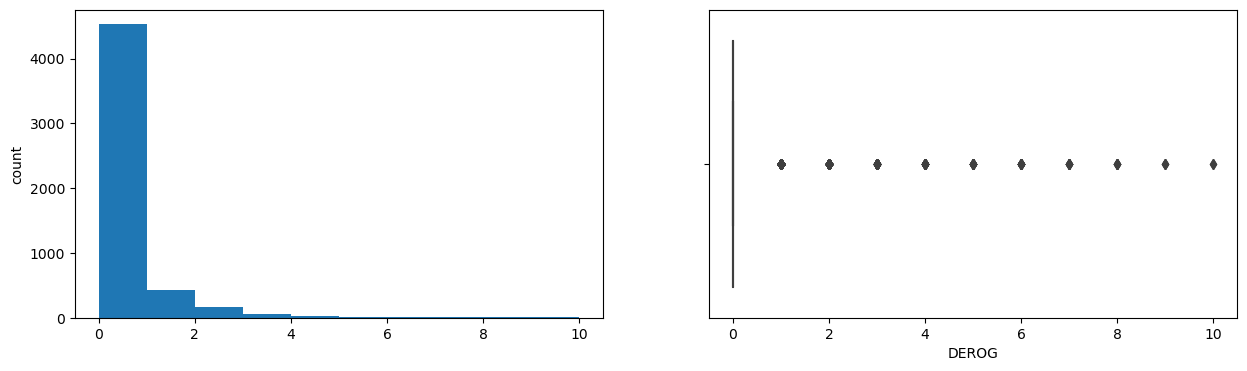

DELINQ
Skew: 4.02


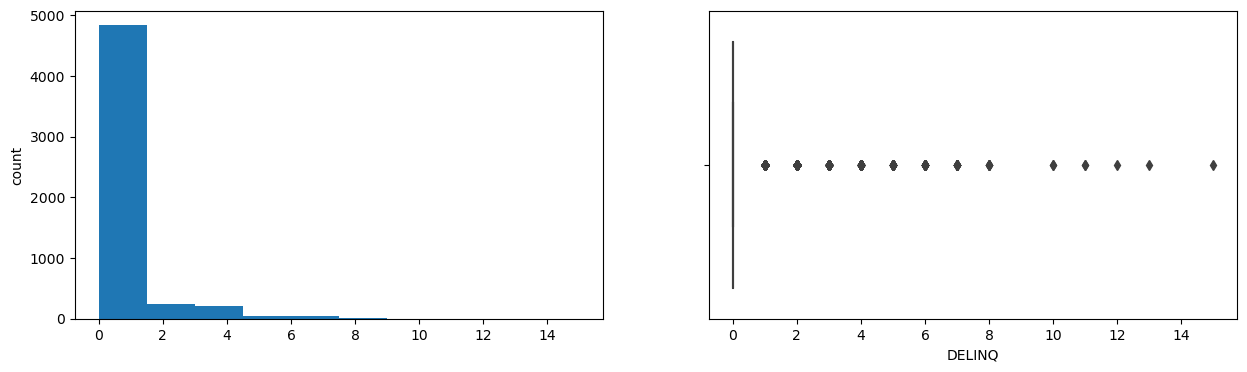

CLAGE
Skew: 1.34


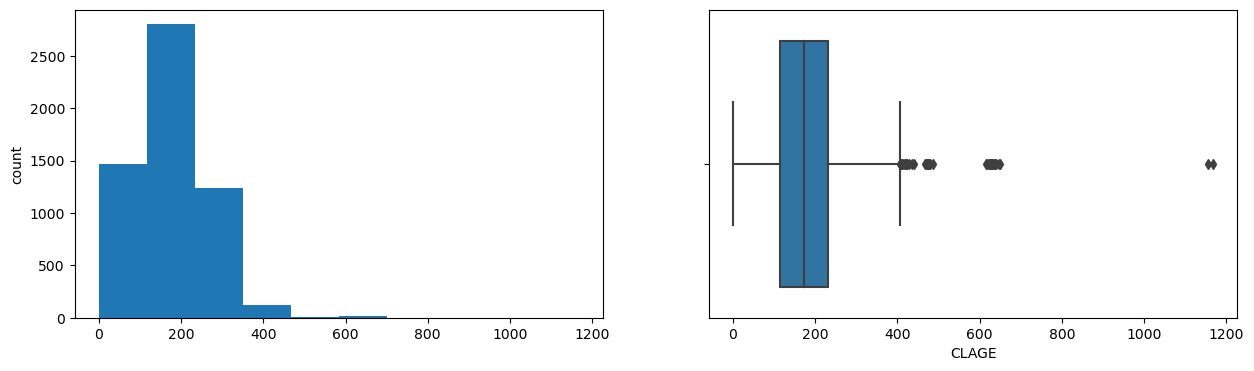

NINQ
Skew: 2.62


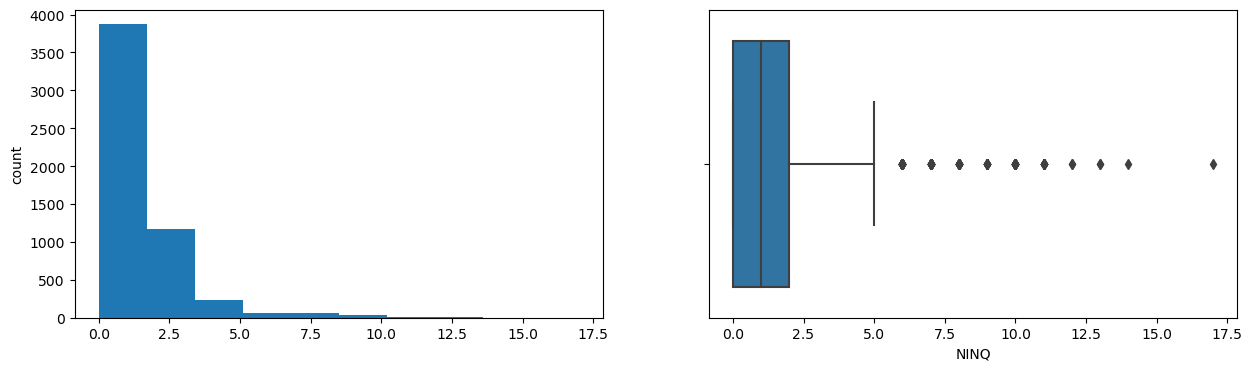

CLNO
Skew: 0.78


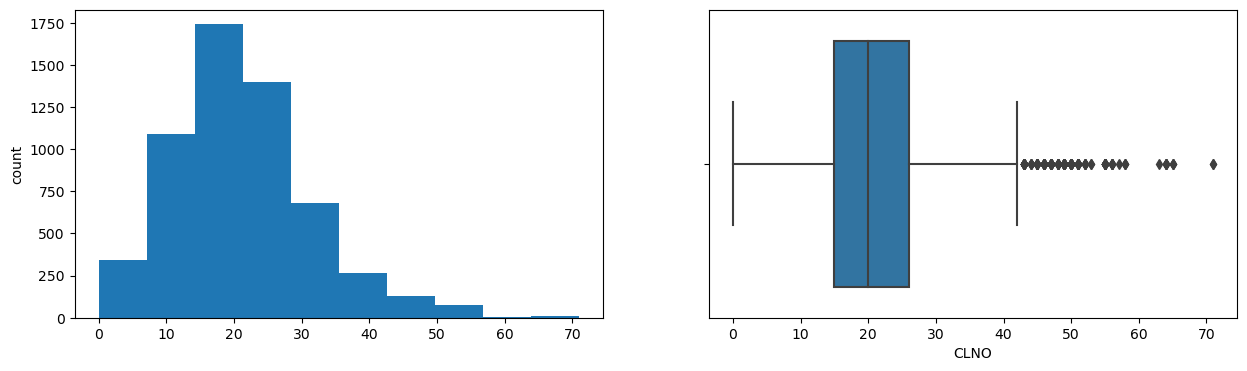

DEBTINC
Skew: 2.85


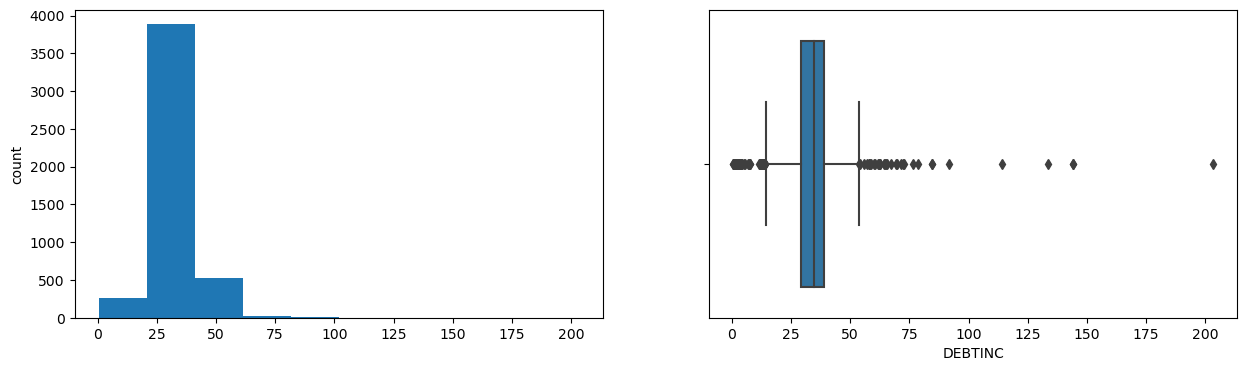

In [19]:
# Generate histograms and box plots for all numerical variables
for col in num_col[1:]:
    print(col)
    print('Skew:',round(df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.show()

**Observations:**
* The loan amount is skewed right, with everything above \$42,000  identified as outliers.
- The amount due on existing mortgage is skewed right, with everything above \$156,000 identified as outliers.
- The current value of property is skewed right, with everything above \\$200,000 identified as outliers and a max over \$800,000.
- Years at present job has highest peak between 0 and 5 years, with a median near 7 years. Everything above 28 years is considered an outlier.
- A large majority of loans were made to individuals with zero derogatory reports. Any loans made to those with major derogatory reports are identified as outliers.  
- Large majority of loans were made to individuals with zero delinquent credit lines. Any loans made to those with delinquent credit lines are identified as outliers.  
- The age of oldest credit lines for individuals has a somewhat normal distribution.
- Most individuals had 0-1 recent credit inquiries, while some individuals had 5 or more. Those with more than 5 recent inquiries were identified as outliers.
- The number of existing credit lines is close to normal distribution but is skewed right. Those with more than 42 existing credit lines are identified as outliers.
- The majority of individuals have a debt-to-income ratio below 40%. Those with a debt-to-income ratio greater than 53% are identified as outliers. Some data points show individuals who have a debt-to-income ratio above 100%.

### **Bivariate Analysis**

A bivariate analysis of the data allows us to visualize any relationships among pairs of variables. 

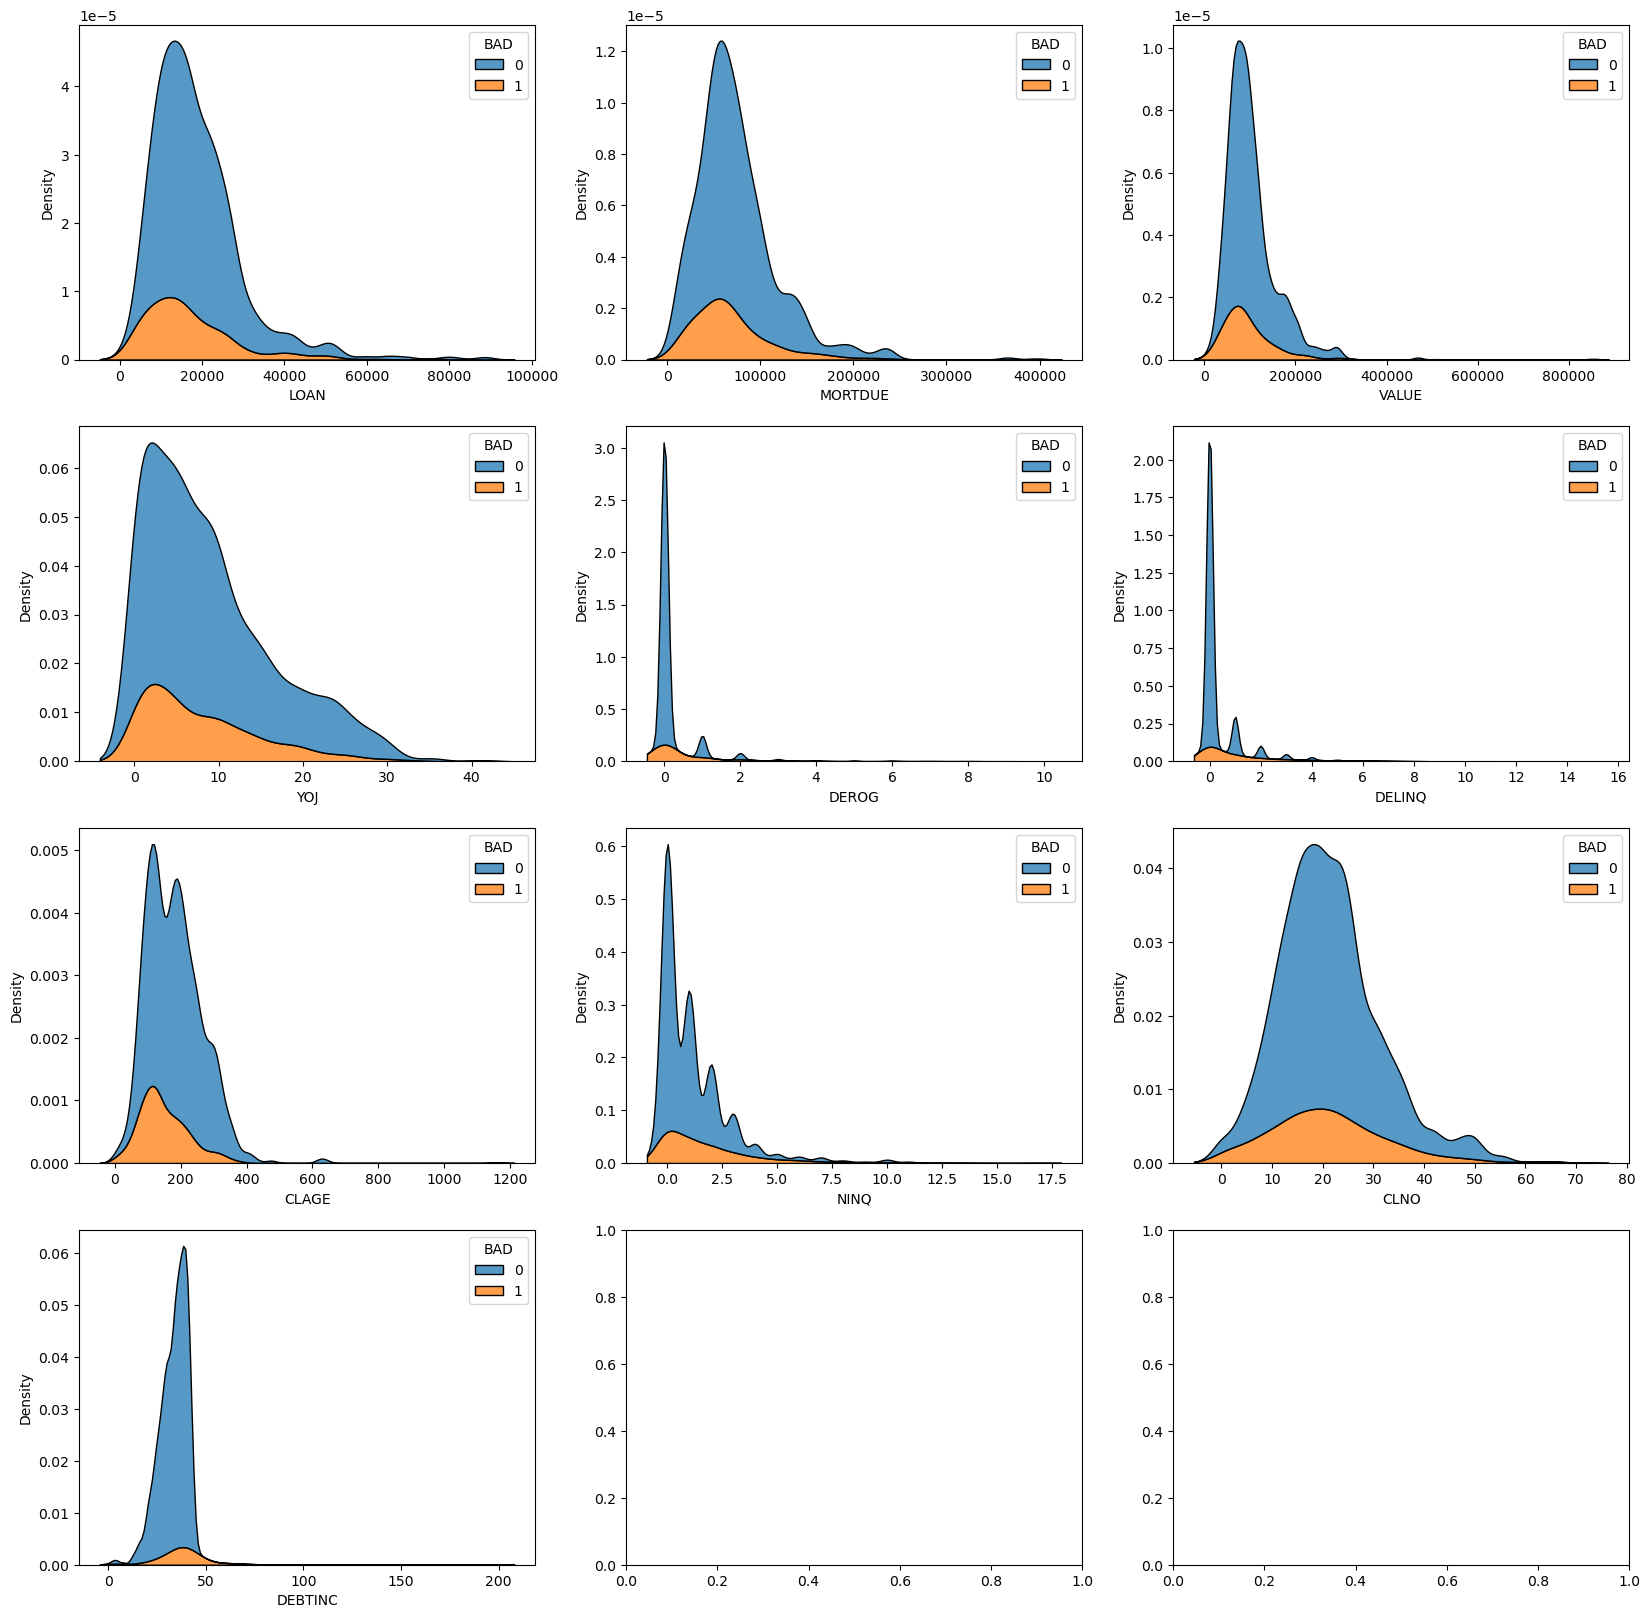

In [20]:
# Looking at distribution for each numerical variable by loan default indicator.
# Use kdeplot to get a less cluttered view and to compare the distribution by loan default
fig, axes = plt.subplots(4, 3, figsize = (20,20))
r=0
c=0
for index,var in enumerate(num_col[1:]):
    if index<3: r,c=0,index
    elif index<6: r,c=1,index-3
    elif index<9: r,c=2,index-6
    else: r,c=3,index-9
  
    sns.kdeplot(df[var],hue=df['BAD'],fill=True,multiple='stack',ax=axes[r,c])

**Observations:**
- On visual inspection, the kde distributions of loans that default and loans that do not default look similar.
- It is difficult to determine from these plots what is happening in the tails.
- The distributions for debt-to-income ratio look a bit different with the defaulting loans appearing to extend into higher values of debt-to-income ratio while those that do not default drop off sharply.

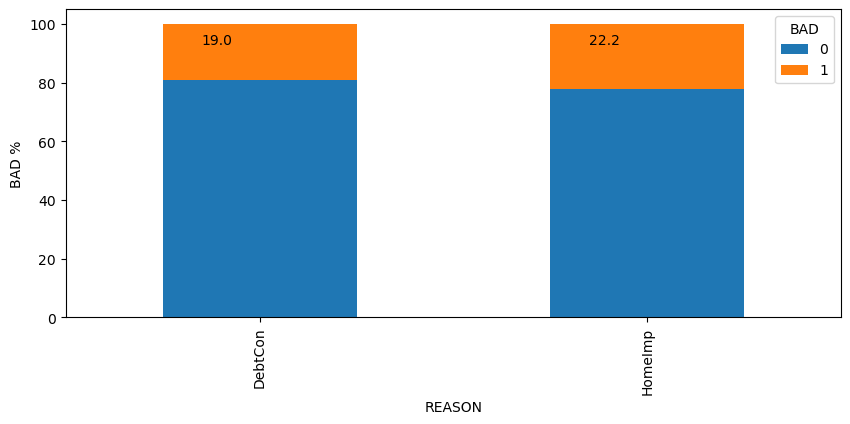

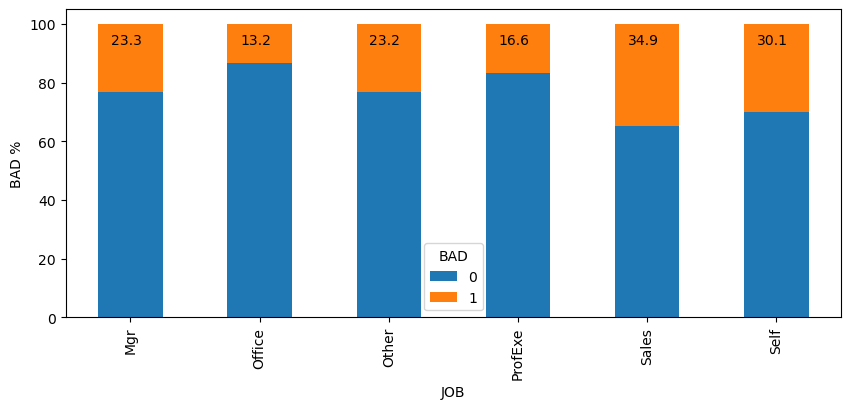

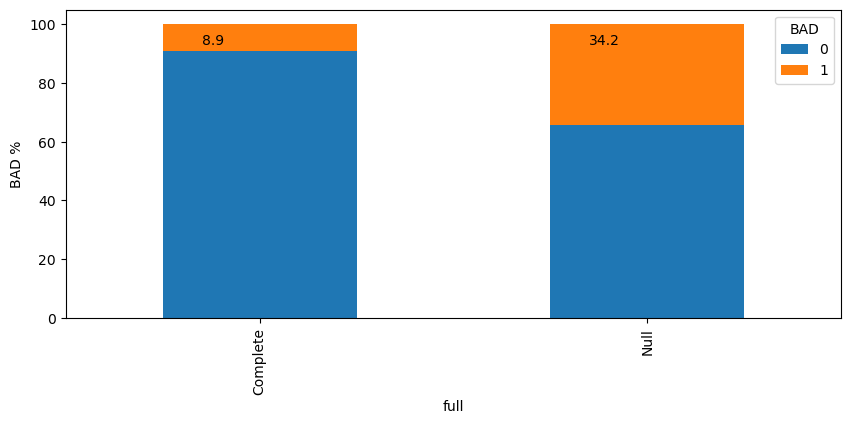

In [21]:
#Examine relationship between categorical variables and loan default indicator (BAD)
for col in cat_col:
    ax=(pd.crosstab(df[col], df['BAD'], normalize = 'index')*100).plot(kind = 'bar', figsize = (10, 4), stacked = True)
    plt.ylabel('BAD %')
    for p in ax.patches:
        if p.get_height()<50:
            ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, 93))

**Observations:**
- The loan default rate is only slightly different between debt consolidation loans (19%) and home improvement loans (22.2%).
- The loan default rate varies by job type, with the highest default rate being for those identified as sales (34.9%) followed by those identified as self employed (30.1%).
- The lowest loan default rate was for those who had the job type Office (13.2%).
- As previously noted, the rows containing missing data have a significantly higher default rate (34.2% default) than those with complete data (8.9% default).

In [23]:
# View means for all numerical variables by loan default indictor
df.groupby(['BAD'])[num_col].mean()

BAD          LOAN       MORTDUE          VALUE       YOJ     DEROG  \
BAD                                                                       
0    0.0  19028.107315  74829.249055  102595.921018  9.154941  0.134217   
1    1.0  16922.119428  69460.452973   98172.846227  8.027802  0.707804   

       DELINQ       CLAGE      NINQ       CLNO    DEBTINC  
BAD                                                        
0    0.245133  187.002355  1.032749  21.317036  33.253129  
1    1.229185  150.190183  1.782765  21.211268  39.387645

**Observations:**
The largest differences in means between those who defaulted on their loans and those who did not are the following: 
- Number of major derogatory reports, 0.71 for defaults versus 0.13 for no-default.
- Number of delinquent credit lines, 1.23 for defaults versus 0.25 for no-default.
- Number of recent credit inquiries, 1.78 for defaults versus 1.03 for no-default. 
- Debt-to-income ratio, 39.4% for defaults versus 33.3% for no-default.

In general, people who defaulted on their home equity loans had almost 450% more major derogatory reports, had 400% more delinquent credit lines, 73% more recent credit inquiries and had debt-to-income ratios that were 6% higher than those who did not default.

#### View boxplots segmented by loan default status

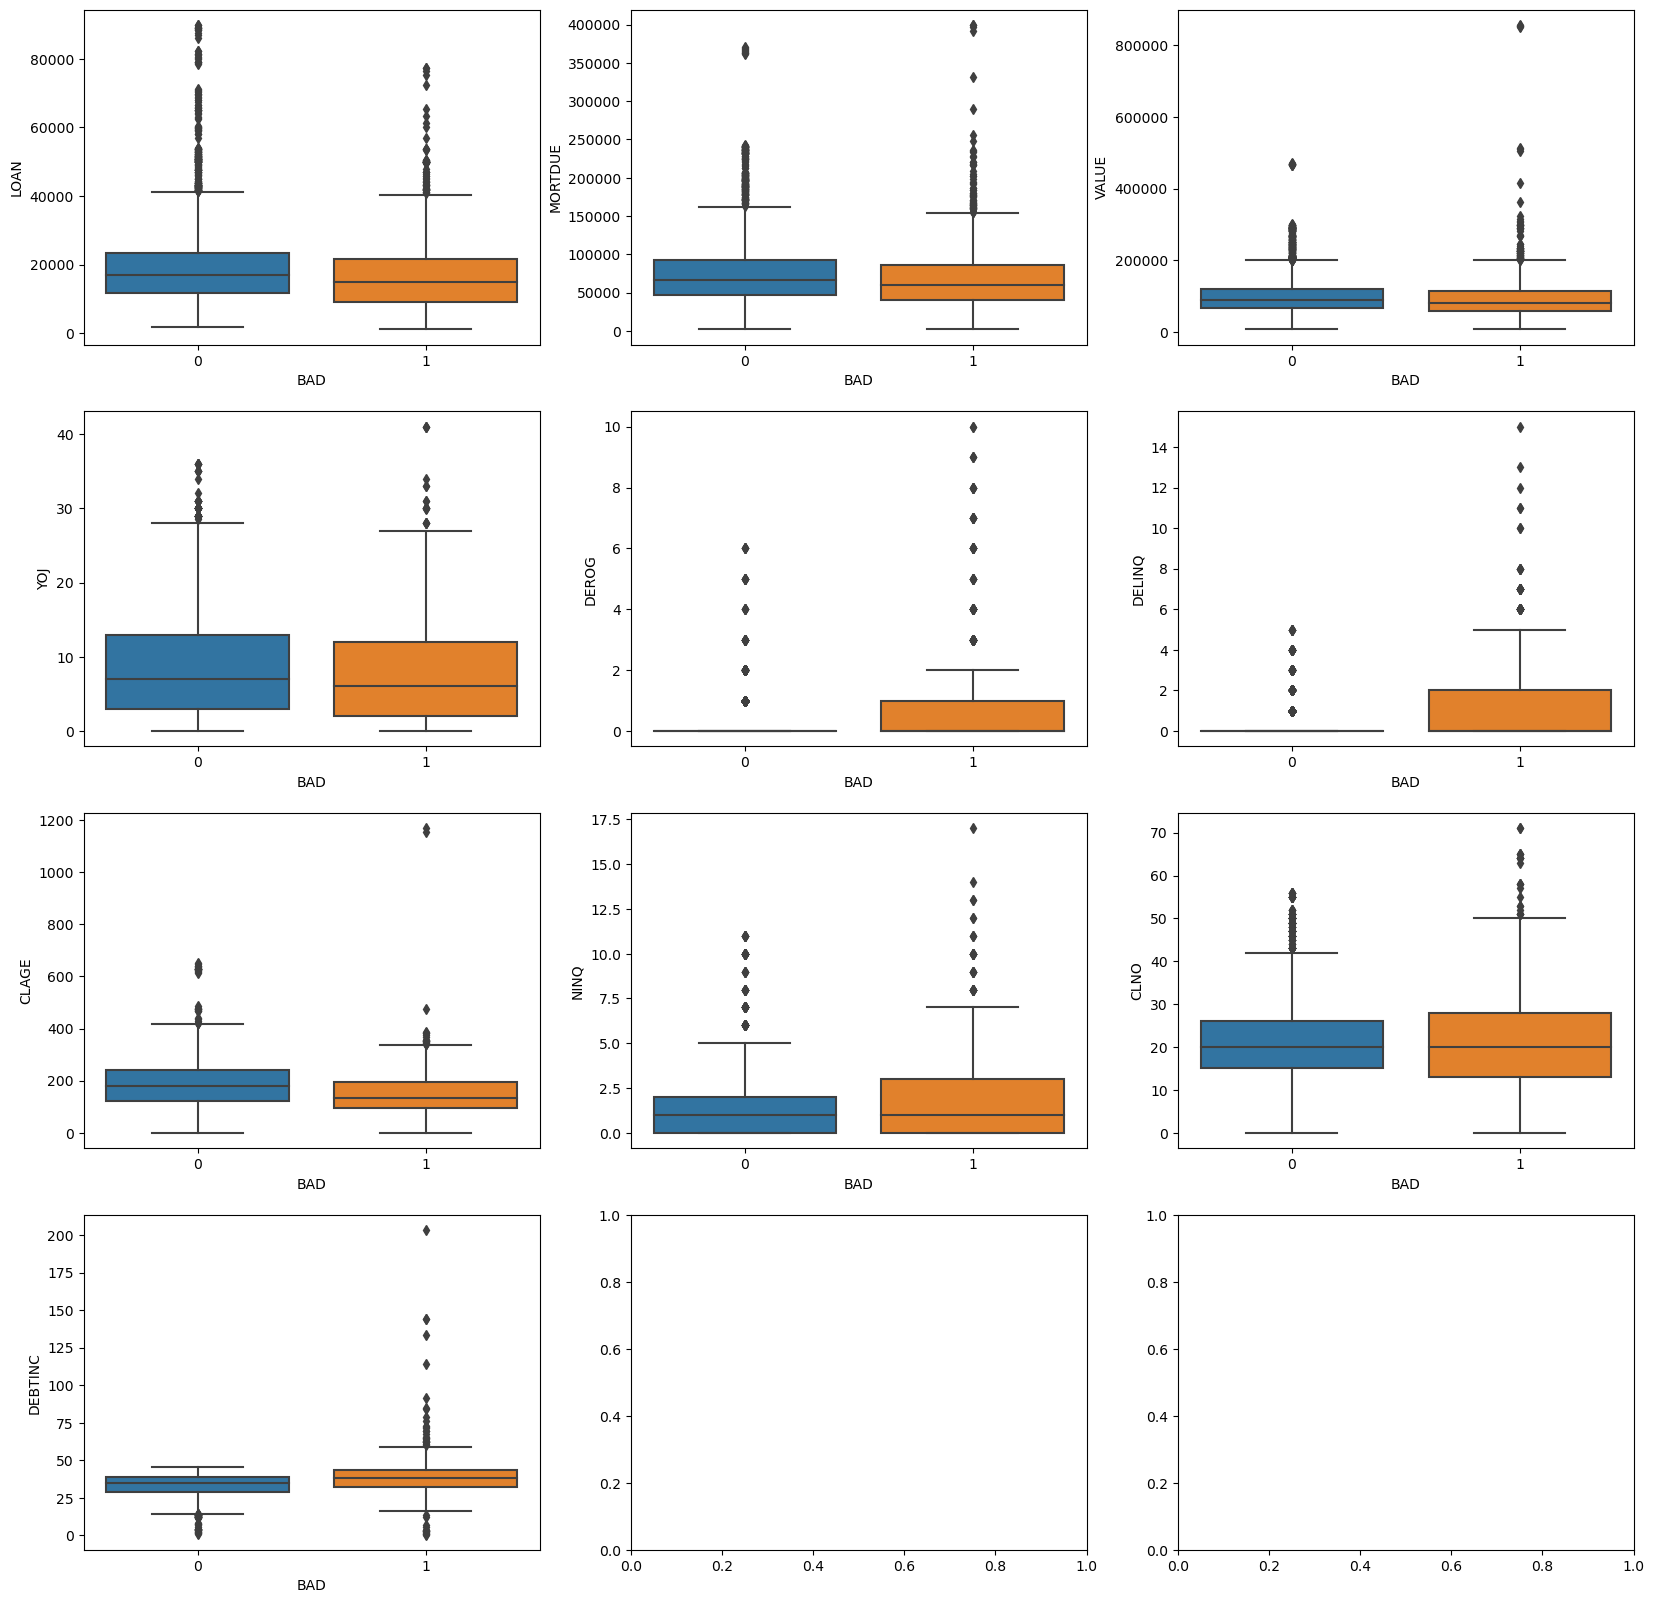

In [24]:
# Create side-by-side box plots for each numeric variable in the dataset comparing by loan default status

fig, axes = plt.subplots(4, 3, figsize = (20, 20))
r=0      # create variable to index row for subplot
c=0      # create variable to index column for subplot

for index,col in enumerate(num_col[1:]):  # loop through all numeric variables
    if index<3: r,c=0,index
    elif index<6: r,c=1,index-3
    elif index<9: r,c=2,index-6
    else: r,c=3,index-9
    sns.boxplot(x = 'BAD', y = col, data = df,ax=axes[r,c]);  # plot each subplot in designated location

**Observations:**
- When comparing those who defaulted to those who did not, the distributions of amount of loan, amount due on existing mortgage, current value of property and years on job look very similar.
- The greatest differences in distributions are with the number of major derogatory reports and the number of delinquent credit lines. 
- For loans that did not default, borrowers had 0 derogatory reports and 0 delinquent credit lines, with the exceptions of those identified as outliers. 
- For loans that did default, the upper whisker was at 2 major derogatory reports, with outliers up to 10 major derogatory reports.
- For loans that did default, the upper whisker was at 5 delinquent credit lines, with outliers up to 15.
- Both loan types had a median number of recent credit inquiries of 1, however the upper 50% of data for loans that defaulted was much more variable with outliers reaching up to 17 recent inquiries.
- Both loan types had similar median number of existing credit lines, however there is more variability for those who defaulted.
- The debt-to-income ratio for those who defaulted is slightly higher than those who did not. Loans that defaulted have outliers reaching up to 200% debt-to-income ratio.
- People who defaulted on their loans had major derogatory reports, had delinquent credit lines, had more recent credit inquiries and had higher debt-to-income ratios.

### **Multivariate Analysis**

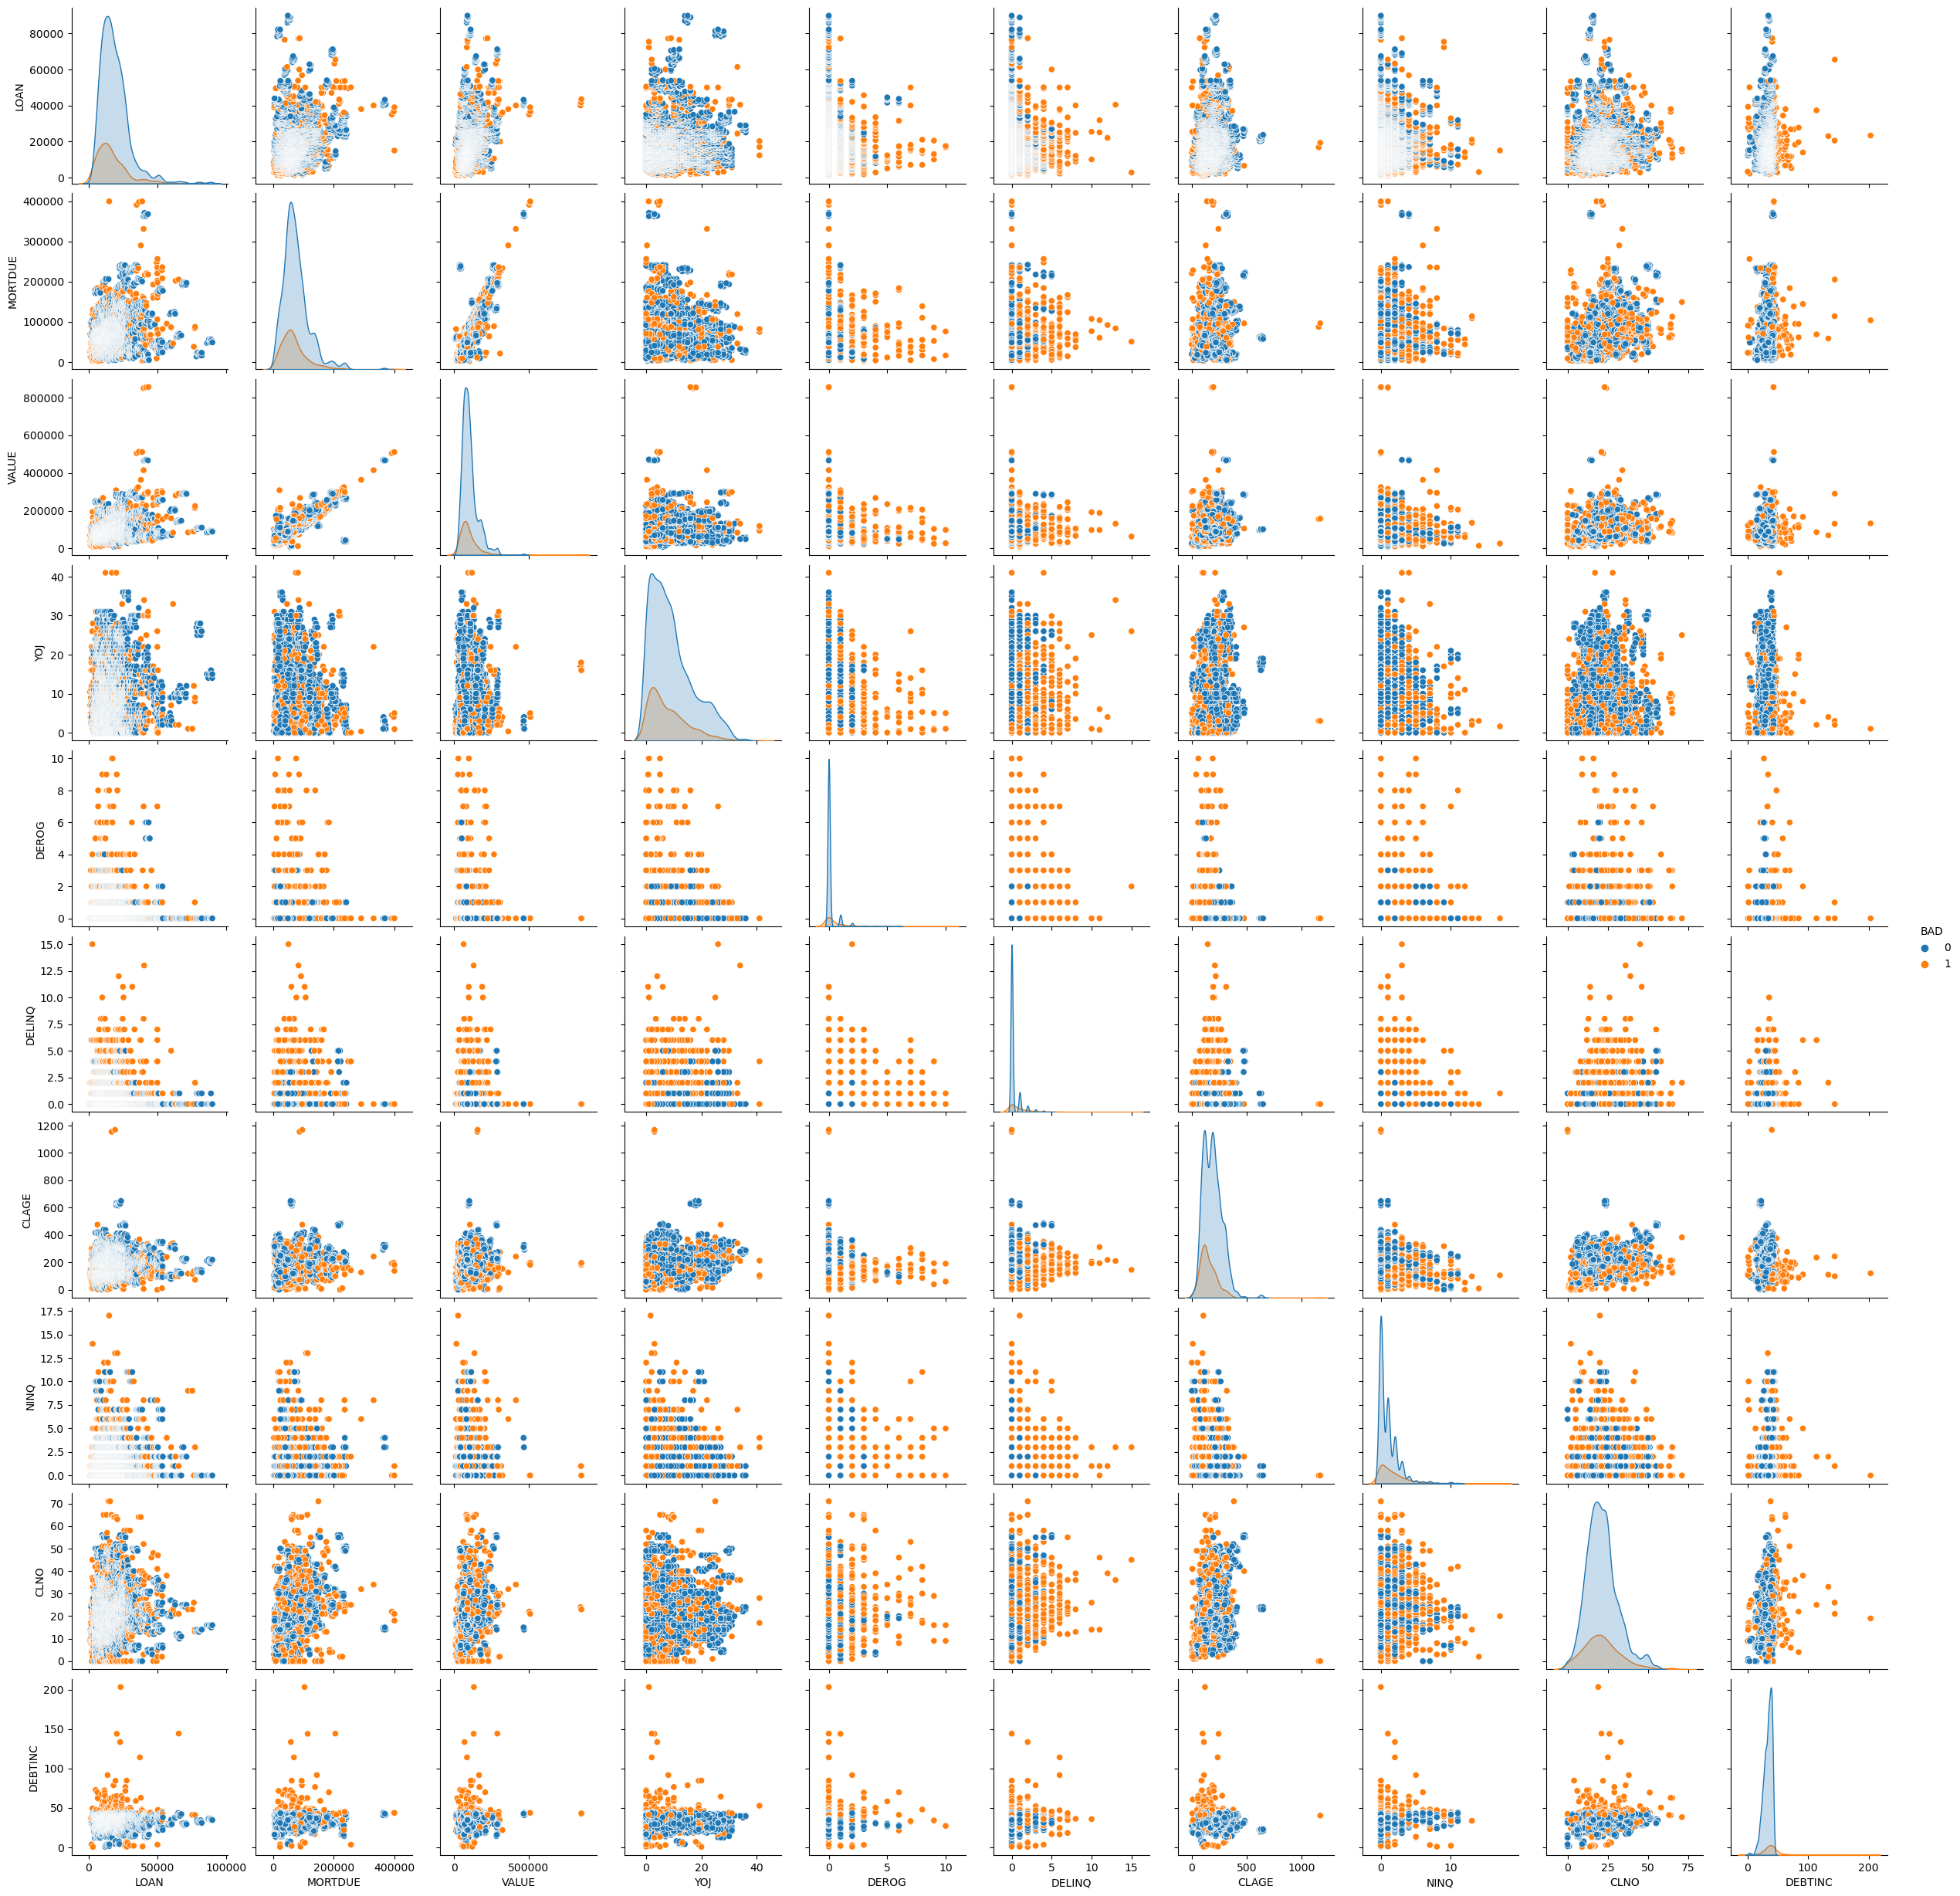

In [25]:
# Generate scatter plots for all numeric variables.
sns.pairplot(df,vars=num_col[1:],corner=False,hue='BAD')

**Observations:**
- For many combinations of the numeric variables, the two colors are well mixed, indicating that the data is distributed similarly across those two variables regardless of loan default status. 
- The amount due on mortgage and current value of property show a positive linear association as expected.
- For DEROG, DELINQ, DEBTINC, the scatter plots clearly show loans that defaulted typically extend into higher values than those that did not default.


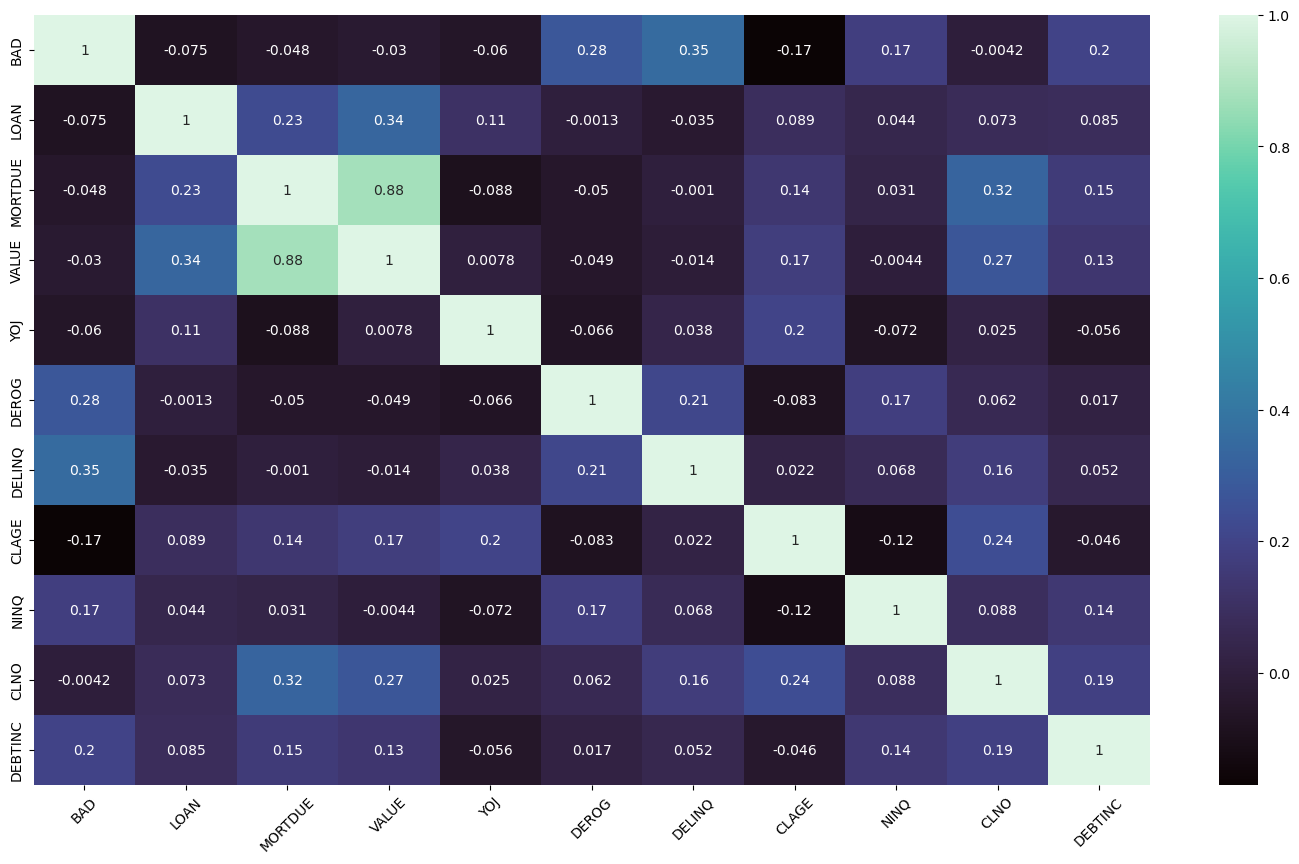

In [26]:
# Examine correlation of numeric variables by heatmap
fig = plt.figure(figsize = (18, 10))

sns.heatmap(data.corr(), annot = True,cmap='mako');

plt.xticks(rotation = 45);

**Observations:**
- The heatmap shows the strongest correlation (0.88) exists between MORTDUE and VALUE, the amount due on the existing mortgage and the current value of the property. This makes sense as mortgage amounts are typically based on property value.
- There are several much weaker correlations that are visible in the heatmap.

> - Correlation between BAD and DELINQ is 0.35: the loan default indicator and the number of delinquent credit lines for the individual.
> - Correlation between VALUE and LOAN is 0.34: the current value of the property and the number of existing credit lines.
> - Correlation between MORTDUE and CLNO is 0.32: the amount due on existing mortgage and the number of existing credit lines.
> - Correlation between BAD and DEROG is 0.28: the loan default indicator and the number of major derogatory reports for the individual.
> - Correlation between VALUE and CLNO is 0.27: the current value of the property and the number of existing credit lines.
> - Correlation between MORTDUE and LOAN is 0.23: the amount due on existing mortgage and the amount of the loan.

## Treating Outliers

While there are outliers in each numerical variable, we will leave these in the dataset as they contain important information regarding characteristics of the loans.

## Treating Missing Values

In [35]:
# Make a copy of the dataset before imputing values
dfimp=df.copy()

In [36]:
# Replace null values for numerical variables with the median for that column 
# based on the value of BAD, loan default status

for col in dfimp[['LOAN','MORTDUE','VALUE','YOJ','CLAGE','NINQ','CLNO','DEBTINC','DEROG','DELINQ']].columns:
    for bad_value, bad_group in dfimp.groupby('BAD'):  # for each level of BAD
        group_median = bad_group[col].median()    # calculate the median for the current column
        # for each row in this BAD group, if value is null, replace with median for this BAD group
        dfimp.loc[(dfimp['BAD']==bad_value) & (dfimp[col].isnull()), col] = group_median 
       

In [37]:
# Replace missing values in categorical fields with the mode
dfimp['JOB'] = dfimp['JOB'].fillna(dfimp['JOB'].mode()[0])
dfimp['REASON'] = dfimp['REASON'].fillna(dfimp['REASON'].mode()[0])

In [38]:
# Confirm that there are no longer any missing values in the dataset
dfimp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5960 non-null   float64
 3   VALUE    5960 non-null   float64
 4   REASON   5960 non-null   object 
 5   JOB      5960 non-null   object 
 6   YOJ      5960 non-null   float64
 7   DEROG    5960 non-null   float64
 8   DELINQ   5960 non-null   float64
 9   CLAGE    5960 non-null   float64
 10  NINQ     5960 non-null   float64
 11  CLNO     5960 non-null   float64
 12  DEBTINC  5960 non-null   float64
 13  full     5960 non-null   object 
dtypes: float64(9), int64(2), object(3)
memory usage: 652.0+ KB


## **Important Insights from EDA**

**Description of Data:**
- There are 5960 observations and 13 columns in the data.
- Each field contains null values with the exception of BAD and LOAN, which indicate the default status and the amount of the loan approved.
- There are 11 numerical variables, one of which is BAD, a binary variable indicating loan default status.
- There are 2 categorical variables indicating the reason for the loan and the job type of the borrower.

**Data Cleaning:**
- Since the features have different scales, we will need to scale the data. This is most important with running a logistic regression model.
- I will use the Standard Scaler method which scales the data using the Z-score.
- Outliers will remain in the data and be included in training models.
- Missing values for categorical variables were replaced with the mode. For REASON, missing values were replaced with debt consolidation and for JOB, other.
- For numerical variables, missing values were replaced with the median value for that variable dependent on the loan default status, BAD. In other words, missing values in observations with a BAD of 1 were replaced by the median value for that column within the subgroup where BAD equals 1. 

**Observations from EDA:**
- Roughly 20% of borrowers in the dataset defaulted on their home equity loan resulting in losses for the bank.
- Seventy-five percent of the loans are less than \\$23,350 with an average loan amount of \\$18,608, and a maximum of \\$89,900.
- Seventy-five percent of borrowers owe less than \\$91,500 on their existing mortgage, with an average amount due of \\$73,761, and a range from \\$2,063 to \\$399.550. 
- The average value of the existing property is \\$101,776, with a range from \\$8,000 to \\$855,909. 75% of the properties have a value below \\$119,900.
- Most borrowers have been at their present job for 13 years or less, with the top 25 percent of borrowers in their job from 13 to 41 years.
- The average number of major derogatory reports is 0.25, with more than 75% of borrowers having 0 and others having up to 10 reports.
- The average number of delinquent credit lines is 0.45, with more than 75% of borrowers having 0 and others having up to 15 delinquent credit lines.
- The average age of the oldest credit line in months is 180 months (15 years), with a range from 0 to 1168 months.
- The average number of recent credit inquiries is 1.19 with a median of 1 and a maximum of 17 recent inquiries.
- The average number of existing credit lines is 21.3 with a range from 0 to 71. The exact meaning of this variable is a little unclear. It seems unlikely that individuals would have an average as high as 21 credit lines.
- The average debt-to-income ratio for borrowers is 33.8% with a minimum of 0.52% and a maximum of 203.3%. Seventy-five percent of borrowerss have a debt to income ratio below 39.1%.
- Borrowers who did not default on their loans typically had 0 derogatory reports and 0 delinquent credit lines, with the exceptions of those identified as outliers.
- The majority of borrowers who did default on their loans had 2 or fewer derogatory reports, with outliers up to 10 major derogatory reports.
- The majority of borrowers who did default on their loans had 5 or fewer delinquent credit lines, with outliers up to 15.
- Both loan types had a median number of recent credit inquiries of 1, however the upper 50% of data for loans that defaulted was much more variable with outliers reaching up to 17 recent inquiries.
- Both loan types had similar median number of existing credit lines, however there is more variability for those who defaulted.
- The debt-to-income ratio for those who defaulted is slightly higher than those who did not. Loans that defaulted have outliers reaching up to 200% debt-to-income ratio.
- People who defaulted on their loans had major derogatory reports, had delinquent credit lines, had more recent credit inquiries and had higher debt-to-income ratios.

## **Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

## Preparing data for modeling

In [39]:
# Separate the target variable and other variables
# also dropping the additional column created that tags rows with missing values ('full')
X = dfimp.drop(columns = ['BAD','full'])
Y = dfimp['BAD']

In [40]:
X.describe()

LOAN        MORTDUE          VALUE          YOJ        DEROG  \
count   5960.000000    5960.000000    5960.000000  5960.000000  5960.000000   
mean   18607.969799   73042.551879  101414.588262     8.745260     0.224329   
std    11207.480417   42552.305772   56904.641823     7.262805     0.798458   
min     1100.000000    2063.000000    8000.000000     0.000000     0.000000   
25%    11100.000000   48139.000000   66489.500000     3.000000     0.000000   
50%    16300.000000   66839.000000   88471.500000     7.000000     0.000000   
75%    23300.000000   88200.250000  119004.750000    12.000000     0.000000   
max    89900.000000  399550.000000  855909.000000    41.000000    10.000000   

            DELINQ        CLAGE         NINQ         CLNO      DEBTINC  
count  5960.000000  5960.000000  5960.000000  5960.000000  5960.000000  
mean      0.405705   179.177553     1.170134    21.247819    34.408453  
std       1.079256    83.733181     1.653866     9.951308     7.768443  
min       0.000000     0.000000     0.000000     0.000000     0.524499  
25%       0.000000   117.371430     0.000000    15.000000    30.763159  
50%       0.000000   175.615849     1.000000    20.000000    35.455735  
75%       0.000000   227.143058     2.000000    26.000000    38.079762  
max      15.000000  1168.233561    17.000000    71.000000   203.312149

### Create dummy variables for categorical variables 

In [41]:
# Create dummy variables
X = pd.get_dummies(X, drop_first = True)

In [42]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

In [43]:
# Check the shape and breakdown of loan defaults for the train and test sets
print("Shape of the training set: ", X_train.shape)   
print("Shape of the test set: ", X_test.shape)

print("Percentage of classes in the training set:")
print(y_train.value_counts(normalize = True))

print("Percentage of classes in the test set:")
print(y_test.value_counts(normalize = True))

Shape of the training set:  (4172, 16)
Shape of the test set:  (1788, 16)
Percentage of classes in the training set:
0    0.804171
1    0.195829
Name: BAD, dtype: float64
Percentage of classes in the test set:
0    0.791946
1    0.208054
Name: BAD, dtype: float64


In [44]:
# Scaling the data. 
# Scaling only by fitting on the training set to avoid data leakage due to including test data in calculations of mean, std.
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)

# Applying same transformation to the test set
X_test_scaled = sc.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [45]:
X_test_scaled.describe()

LOAN      MORTDUE        VALUE          YOJ        DEROG  \
count  1788.000000  1788.000000  1788.000000  1788.000000  1788.000000   
mean     -0.000652     0.036210     0.037318     0.007479    -0.026295   
std       1.000197     1.036020     1.118191     1.005175     0.894642   
min      -1.526764    -1.675661    -1.676563    -1.203752    -0.280323   
25%      -0.670142    -0.565490    -0.615670    -0.790044    -0.280323   
50%      -0.206139    -0.136538    -0.228836    -0.238433    -0.280323   
75%       0.427404     0.386905     0.352296     0.451081    -0.280323   
max       6.280983     7.765630    13.727987     4.450261    11.864116   

            DELINQ        CLAGE         NINQ         CLNO      DEBTINC  \
count  1788.000000  1788.000000  1788.000000  1788.000000  1788.000000   
mean      0.023228     0.016702    -0.034495    -0.033391    -0.024140   
std       1.082153     0.974115     1.009058     0.981869     0.905909   
min      -0.378485    -2.082378    -0.719879    -2.133912    -4.250357   
25%      -0.378485    -0.720455    -0.719879    -0.634538    -0.454610   
50%      -0.378485    -0.034029    -0.113512    -0.134747     0.141218   
75%      -0.378485     0.585782     0.492855     0.465002     0.452497   
max      11.022509     5.372719     7.769258     4.363374     9.965930   

       REASON_HomeImp   JOB_Office    JOB_Other  JOB_ProfExe    JOB_Sales  \
count     1788.000000  1788.000000  1788.000000  1788.000000  1788.000000   
mean         0.054516     0.036640    -0.024245    -0.003503     0.052372   
std          1.023580     1.033964     0.997599     0.997833     1.182438   
min         -0.641007    -0.428423    -0.906551    -0.522605    -0.128721   
25%         -0.641007    -0.428423    -0.906551    -0.522605    -0.128721   
50%         -0.641007    -0.428423    -0.906551    -0.522605    -0.128721   
75%          1.560046    -0.428423     1.103082    -0.522605    -0.128721   
max          1.560046     2.334143     1.103082     1.913492     7.768716   

          JOB_Self  
count  1788.000000  
mean      0.004985  
std       1.013412  
min      -0.182167  
25%      -0.182167  
50%      -0.182167  
75%      -0.182167  
max       5.489474

In [46]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4172 entries, 0 to 4171
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LOAN            4172 non-null   float64
 1   MORTDUE         4172 non-null   float64
 2   VALUE           4172 non-null   float64
 3   YOJ             4172 non-null   float64
 4   DEROG           4172 non-null   float64
 5   DELINQ          4172 non-null   float64
 6   CLAGE           4172 non-null   float64
 7   NINQ            4172 non-null   float64
 8   CLNO            4172 non-null   float64
 9   DEBTINC         4172 non-null   float64
 10  REASON_HomeImp  4172 non-null   float64
 11  JOB_Office      4172 non-null   float64
 12  JOB_Other       4172 non-null   float64
 13  JOB_ProfExe     4172 non-null   float64
 14  JOB_Sales       4172 non-null   float64
 15  JOB_Self        4172 non-null   float64
dtypes: float64(16)
memory usage: 521.6 KB


## Model Evaluation

The most important outcome for the bank is being able to predict as many loan defaults as possible. 
The models should prioritize recall so that we are minimizing the number of false negatives.
In other words, the model should identify as high a percentage of loan defaulters as possible.

In [47]:
# Create function to print the classification report and the confusion matrix in proper format
# Input two lists: actual BAD, predicted BAD

def metrics_score(actual, predicted):
    
        print(classification_report(actual, predicted))
    
        cm = confusion_matrix(actual, predicted)
        
        plt.figure(figsize=(8,5))
        sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=['Not Defaulted','Defaulted'], yticklabels=['Not Defaulted','Defaulted'])
        
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show()

In [48]:
# Create function to calculate different metrics for each model
# Input into function: model name, independent variables, target variable

def model_performance_classification(model, predictors, target):
    
    pred = model.predict(predictors)
    recall = recall_score(target, pred, pos_label=1)
    precision = precision_score(target, pred, pos_label=1)
    acc = accuracy_score(target, pred)
    f1 = f1_score(target, pred)
    fb = fbeta_score(target, pred, beta=3)
    
    df_perf = pd.DataFrame(
        {'Precision': precision,
         'Recall': recall,
         'Accuracy': acc,
         'f1-Score': f1,
         'fBeta-Score': fb,
        },
        index = [0],
    )
    
    return df_perf

### Logistic Regression

In [49]:
# Fitting the logistic regression model on the scaled training data
lg = LogisticRegression()

lg.fit(X_train_scaled,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      3355
           1       0.78      0.38      0.51       817

    accuracy                           0.86      4172
   macro avg       0.82      0.68      0.72      4172
weighted avg       0.85      0.86      0.84      4172



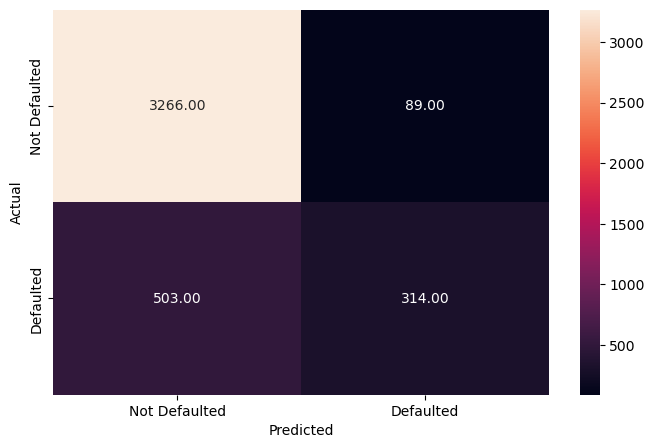

In [50]:
# Checking the performance of the logistic regression model on the training data
y_pred_train = lg.predict(X_train_scaled)

metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1416
           1       0.76      0.36      0.49       372

    accuracy                           0.84      1788
   macro avg       0.81      0.66      0.70      1788
weighted avg       0.83      0.84      0.82      1788



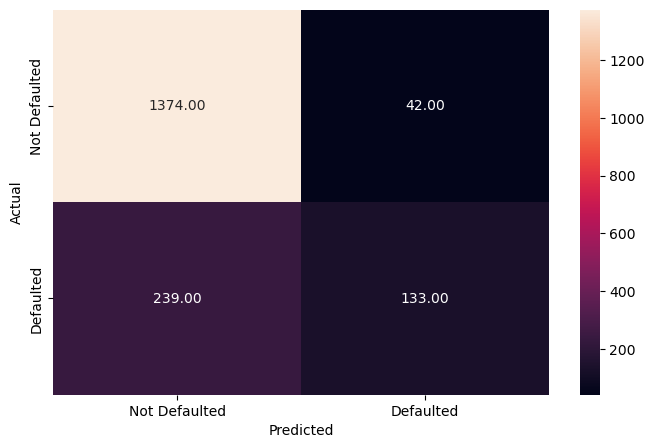

In [51]:
# Checking the performance of the logistic regression model on the test dataset
y_pred_test = lg.predict(X_test_scaled)
metrics_score(y_test, y_pred_test)

In [52]:
lg_test = model_performance_classification(lg,X_test_scaled,y_test)
lg_test

Precision    Recall  Accuracy  f1-Score  fBeta-Score
0       0.76  0.357527  0.842841  0.486289     0.377519

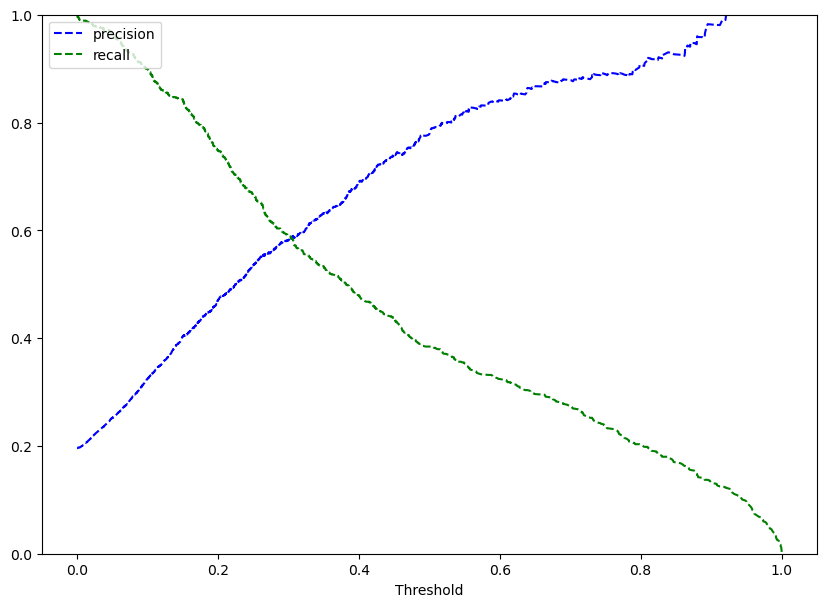

In [53]:
# Generate a precision-recall graph to look at different thresholds.

y_scores_lg = lg.predict_proba(X_train_scaled) # predict_proba gives the probability of each observation belonging to each class

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

**Observations on Logistic Regression:**

- The logistic regression model performs poorly on both the training and test datasets.
- The model identifies roughly 35% of all loan defaults.
- A threshold of approximately 0.32 maximizes both recall and precision, however both values are still under 60%.
- Logistic regression is not a great model for this data set.
- A non-linear model may provide a more accurate prediction.

### Decision Tree

In [54]:
# Fit the decision tree classifier on the training data
dec_tree = DecisionTreeClassifier(random_state=4)
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=4)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



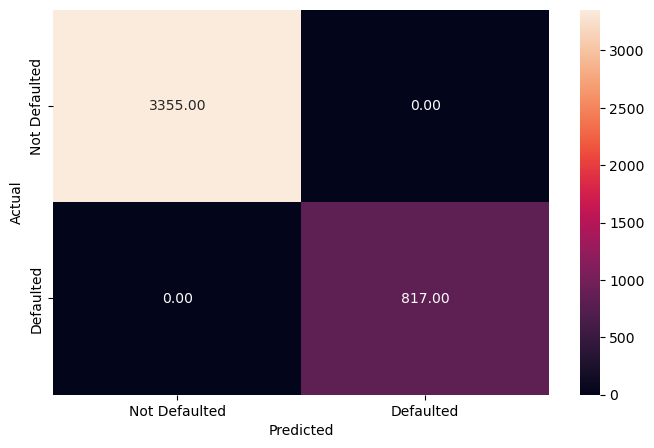

In [55]:
# Check the performance on the training data
# create array of predictions from decision tree model
y_pred_train1 = dec_tree.predict(X_train)

# Call function to print classification report, confusion matrix, heatmap using actual BAD and predicted BAD
metrics_score(y_train, y_pred_train1)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1416
           1       0.90      0.83      0.86       372

    accuracy                           0.94      1788
   macro avg       0.93      0.90      0.91      1788
weighted avg       0.94      0.94      0.94      1788



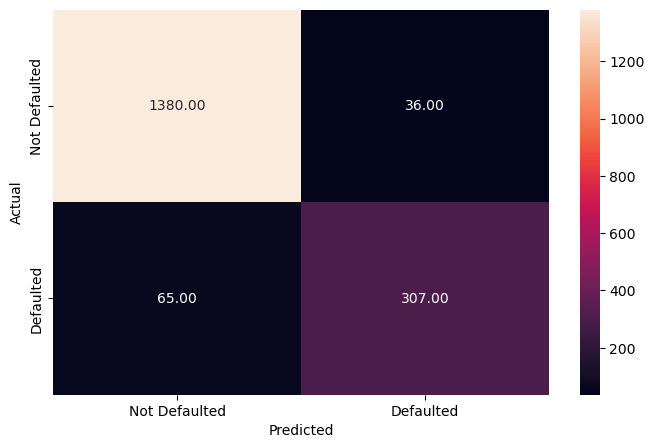

In [56]:
# Check the performance on the test data
y_pred_test1 = dec_tree.predict(X_test)

# Call function to print classification report, confusion matrix, heatmap using actual BAD and predicted BAD
metrics_score(y_test, y_pred_test1)

In [57]:
dec_tree_test = model_performance_classification(dec_tree,X_test,y_test)
dec_tree_test

Precision    Recall  Accuracy  f1-Score  fBeta-Score
0   0.895044  0.825269  0.943512  0.858741     0.831753

<AxesSubplot:xlabel='Importance'>

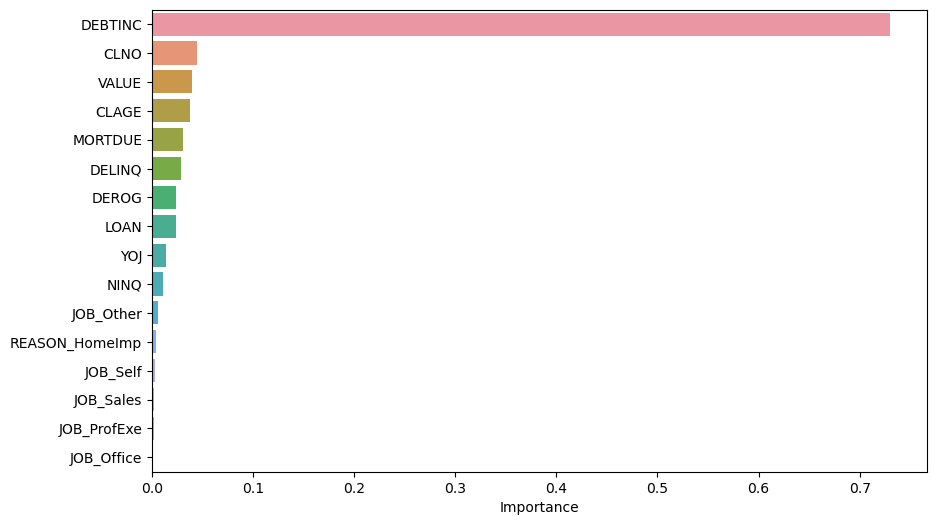

In [58]:
# Plot the feature importance

importances = dec_tree.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (10, 6))

sns.barplot(x = importance_df.Importance, y=importance_df.index)

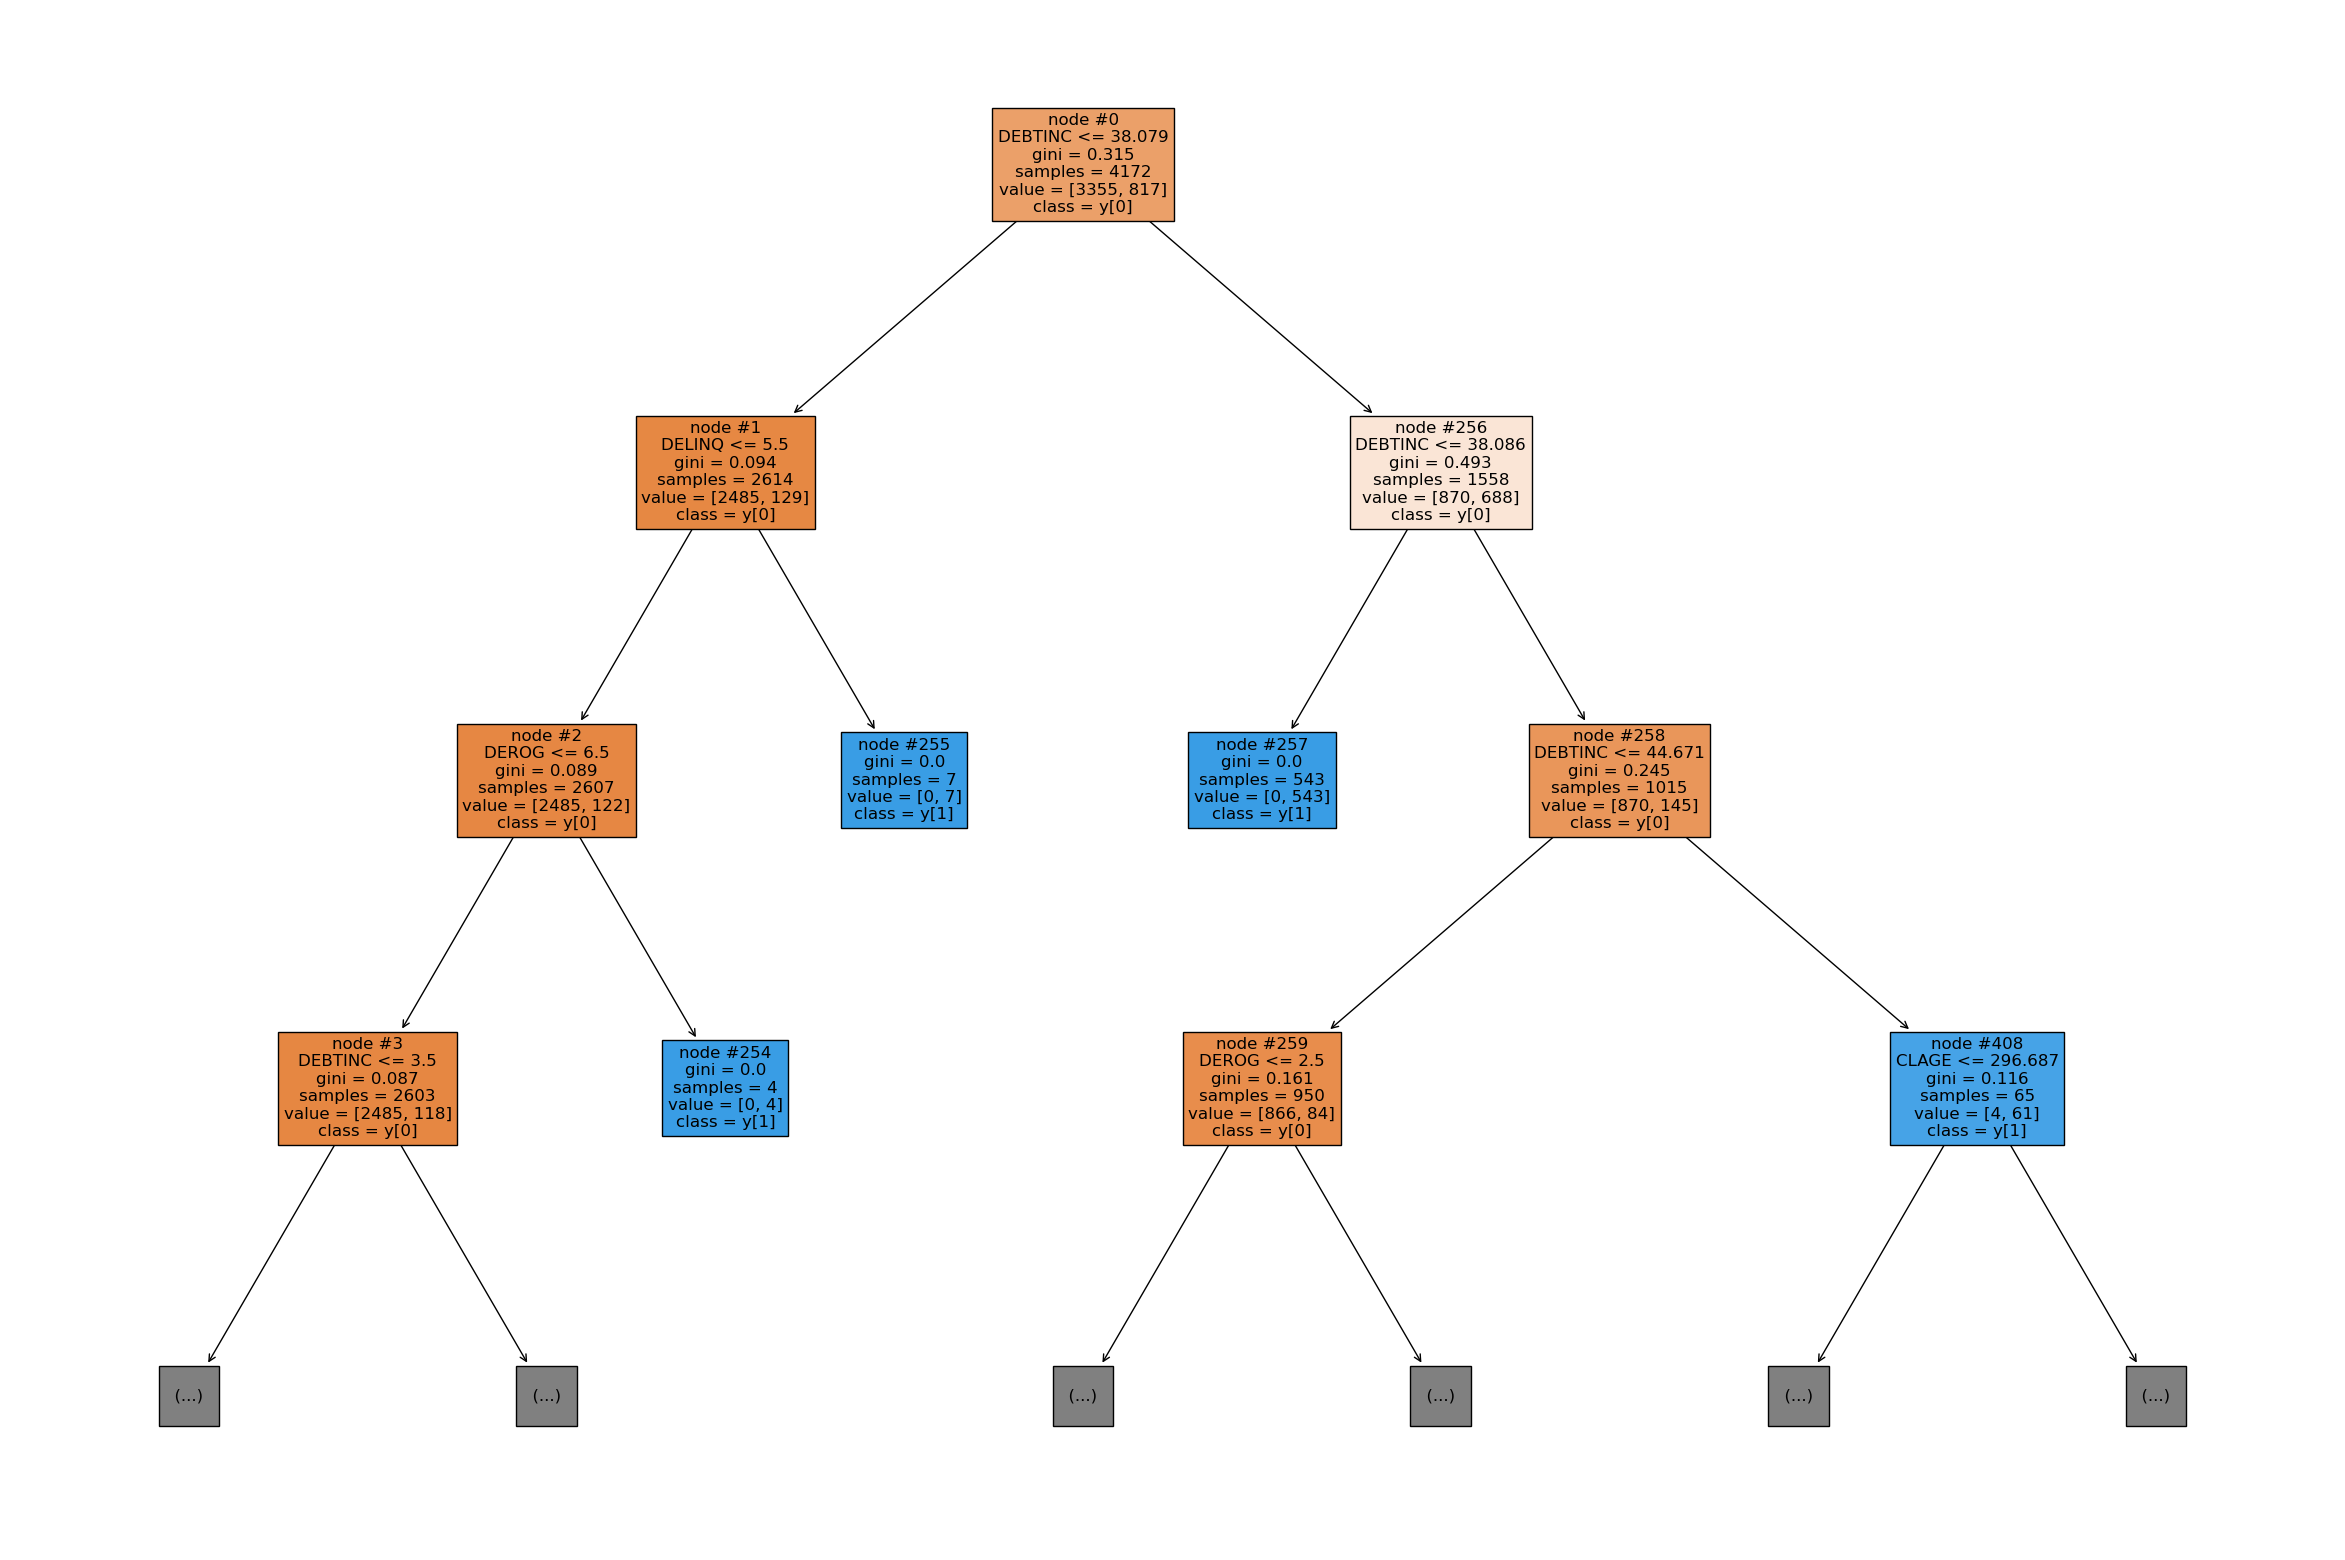

In [74]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dec_tree,max_depth = 3, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

In [61]:
# Get information on the fully formed tree
dec_tree.get_depth(), dec_tree.tree_.n_leaves, dec_tree.tree_.node_count

(22, 209, 417)

**The fully formed tree has a depth of 22, 209 final leaves and a total of 417 nodes.**

**Observations:**

- The decision tree model with default parameters performs fairly well on the test set.
- The model correctly identifies only 82.5% of loans that default (recall = 0.819).
- The precision on the model is good at 89.5%.
- The model has an accuracy of 94.4% and an f1-Score of 85.9%.
- This model is a strong candidate as it has fairly strong recall and precision.
- The most important feature in this model, by far, is the debt-to-income ratio.

- Inspection of the decision tree shows that the root node is debt-to-income ratio.
- Borrowers with a debt-to-income ratio of 44.7% or more are likely to default on thier loans.

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperparameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [62]:
# Choose the type of classifier
dt_tuned = DecisionTreeClassifier(class_weight={0: 0.35, 1: 0.65},random_state=12)

# Establish grid of parameters to evaluate
parameters = {'max_depth': np.arange(12,18),
              'criterion': ['gini','entropy'],
             'min_samples_leaf': [5,20,30],
             'max_features': ['auto',0.5,0.8]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search
gridCV = GridSearchCV(dt_tuned, parameters, scoring=scorer, cv=10, n_jobs=-1)

# Fit the grid search on the training data
gridCV = gridCV.fit(X_train,y_train)

# Set the classifier to the best combination of parameters
dt_tuned = gridCV.best_estimator_

# Fit the best estimator to the data
dt_tuned.fit(X_train,y_train)


DecisionTreeClassifier(class_weight={0: 0.35, 1: 0.65}, max_depth=12,
                       max_features=0.8, min_samples_leaf=5, random_state=12)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3355
           1       0.90      0.94      0.92       817

    accuracy                           0.97      4172
   macro avg       0.94      0.96      0.95      4172
weighted avg       0.97      0.97      0.97      4172



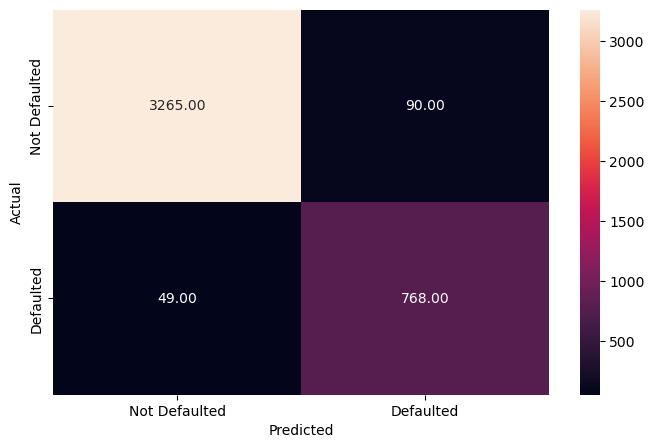

In [63]:
# Check performance on the training dataset
y_train_pred_dt_tuned=dt_tuned.predict(X_train)

metrics_score(y_train, y_train_pred_dt_tuned)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1416
           1       0.82      0.83      0.82       372

    accuracy                           0.93      1788
   macro avg       0.89      0.89      0.89      1788
weighted avg       0.93      0.93      0.93      1788



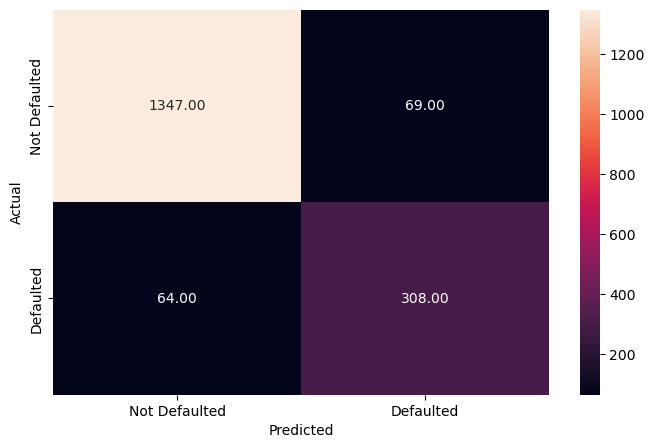

In [64]:
# Check performance on the training dataset
y_test_pred_dt_tuned=dt_tuned.predict(X_test)

metrics_score(y_test, y_test_pred_dt_tuned)

In [65]:
dt_tuned_test = model_performance_classification(dt_tuned,X_test,y_test)
dt_tuned_test

Precision    Recall  Accuracy  f1-Score  fBeta-Score
0   0.816976  0.827957  0.925615   0.82243     0.826846

In [66]:
# Get information about the tuned tree:
dt_tuned.get_depth(), dt_tuned.tree_.n_leaves, dt_tuned.tree_.node_count

(12, 132, 263)

In [67]:
# import Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

# Choose the type of classifier
dt_rs = DecisionTreeClassifier(class_weight={0: 0.35, 1: 0.65},random_state=1)

# Establish grid of parameters to evaluate
parameters = {'max_depth': np.arange(4,18),
              'criterion': ['gini','entropy'],
             'min_samples_leaf': np.arange(3,20),
             'max_features': np.arange(0.1,1,0.1)
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search
rsCV = RandomizedSearchCV(dt_rs, parameters, n_iter=500, scoring=scorer, cv=10, n_jobs=-1,random_state=4)

# Fit the grid search on the training data
rsCV = rsCV.fit(X_train,y_train)

# Set the classifier to the best combination of parameters
dt_rs = rsCV.best_estimator_

# Fit the best estimator to the data
dt_rs.fit(X_train,y_train)


DecisionTreeClassifier(class_weight={0: 0.35, 1: 0.65}, criterion='entropy',
                       max_depth=17, max_features=0.9, min_samples_leaf=3,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3355
           1       0.96      0.97      0.97       817

    accuracy                           0.99      4172
   macro avg       0.98      0.98      0.98      4172
weighted avg       0.99      0.99      0.99      4172



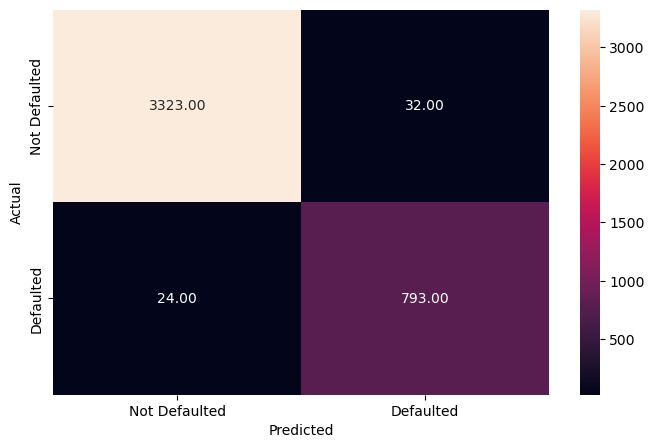

In [68]:
# Check performance on the training dataset
y_train_pred_dt_rs=dt_rs.predict(X_train)

metrics_score(y_train, y_train_pred_dt_rs)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1416
           1       0.88      0.82      0.85       372

    accuracy                           0.94      1788
   macro avg       0.92      0.90      0.91      1788
weighted avg       0.94      0.94      0.94      1788



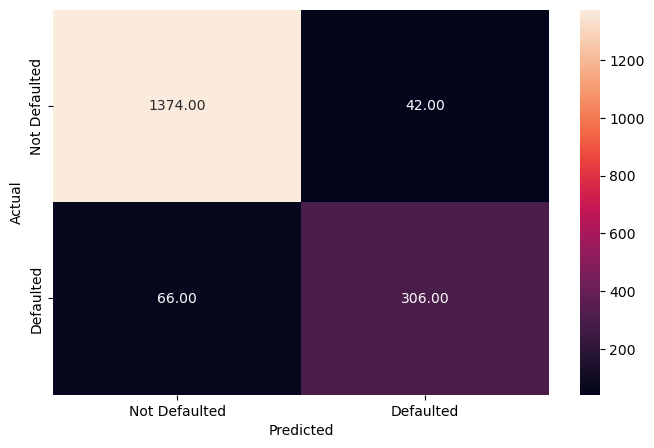

In [69]:
# Check performance on the training dataset
y_test_pred_dt_rs=dt_rs.predict(X_test)

metrics_score(y_test, y_test_pred_dt_rs)

In [70]:
dt_rs_test = model_performance_classification(dt_rs,X_test,y_test)
dt_rs_test

Precision    Recall  Accuracy  f1-Score  fBeta-Score
0    0.87931  0.822581  0.939597      0.85     0.827922

In [71]:
# Get information about the tuned tree:
dt_rs.get_depth(), dt_rs.tree_.n_leaves, dt_rs.tree_.node_count

(17, 169, 337)

**Observations:**

The tuned decision tree has the following parameters:
- class weight {0: 0.35, 1: 0.65}
- criterion='entropy'
- max_depth=17
- max_features=0.9
- min_samples_leaf=3

Minimum impurity decrease and splitter were found to not improve the model.

The tuned decision tree performs well on both the training and the test datasets.
In the test dataset, the model correctly identifies 83% of loans that default (recall = 0.83) with a precision of 88%. 


<AxesSubplot:xlabel='Importance'>

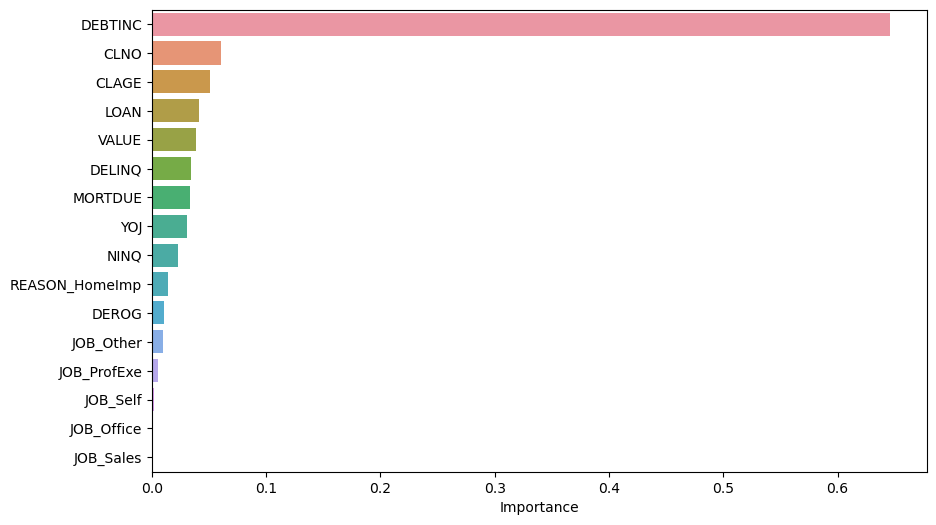

In [72]:
# Plot the feature importance

importances = dt_rs.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (10, 6))

sns.barplot(x = importance_df.Importance, y=importance_df.index)

**Observations on Feature Importance:**
- Debt-to-income ratio is by far the most important feature in the model.
- After that, number of credit lines, followed by credit line age, amount of loan, current value of property and number of delinquent credit lines.
- The tuned model shows that the reason indicated for the loan and the type of job held by the borrower do not have importance in predicting whether the borrower will default.

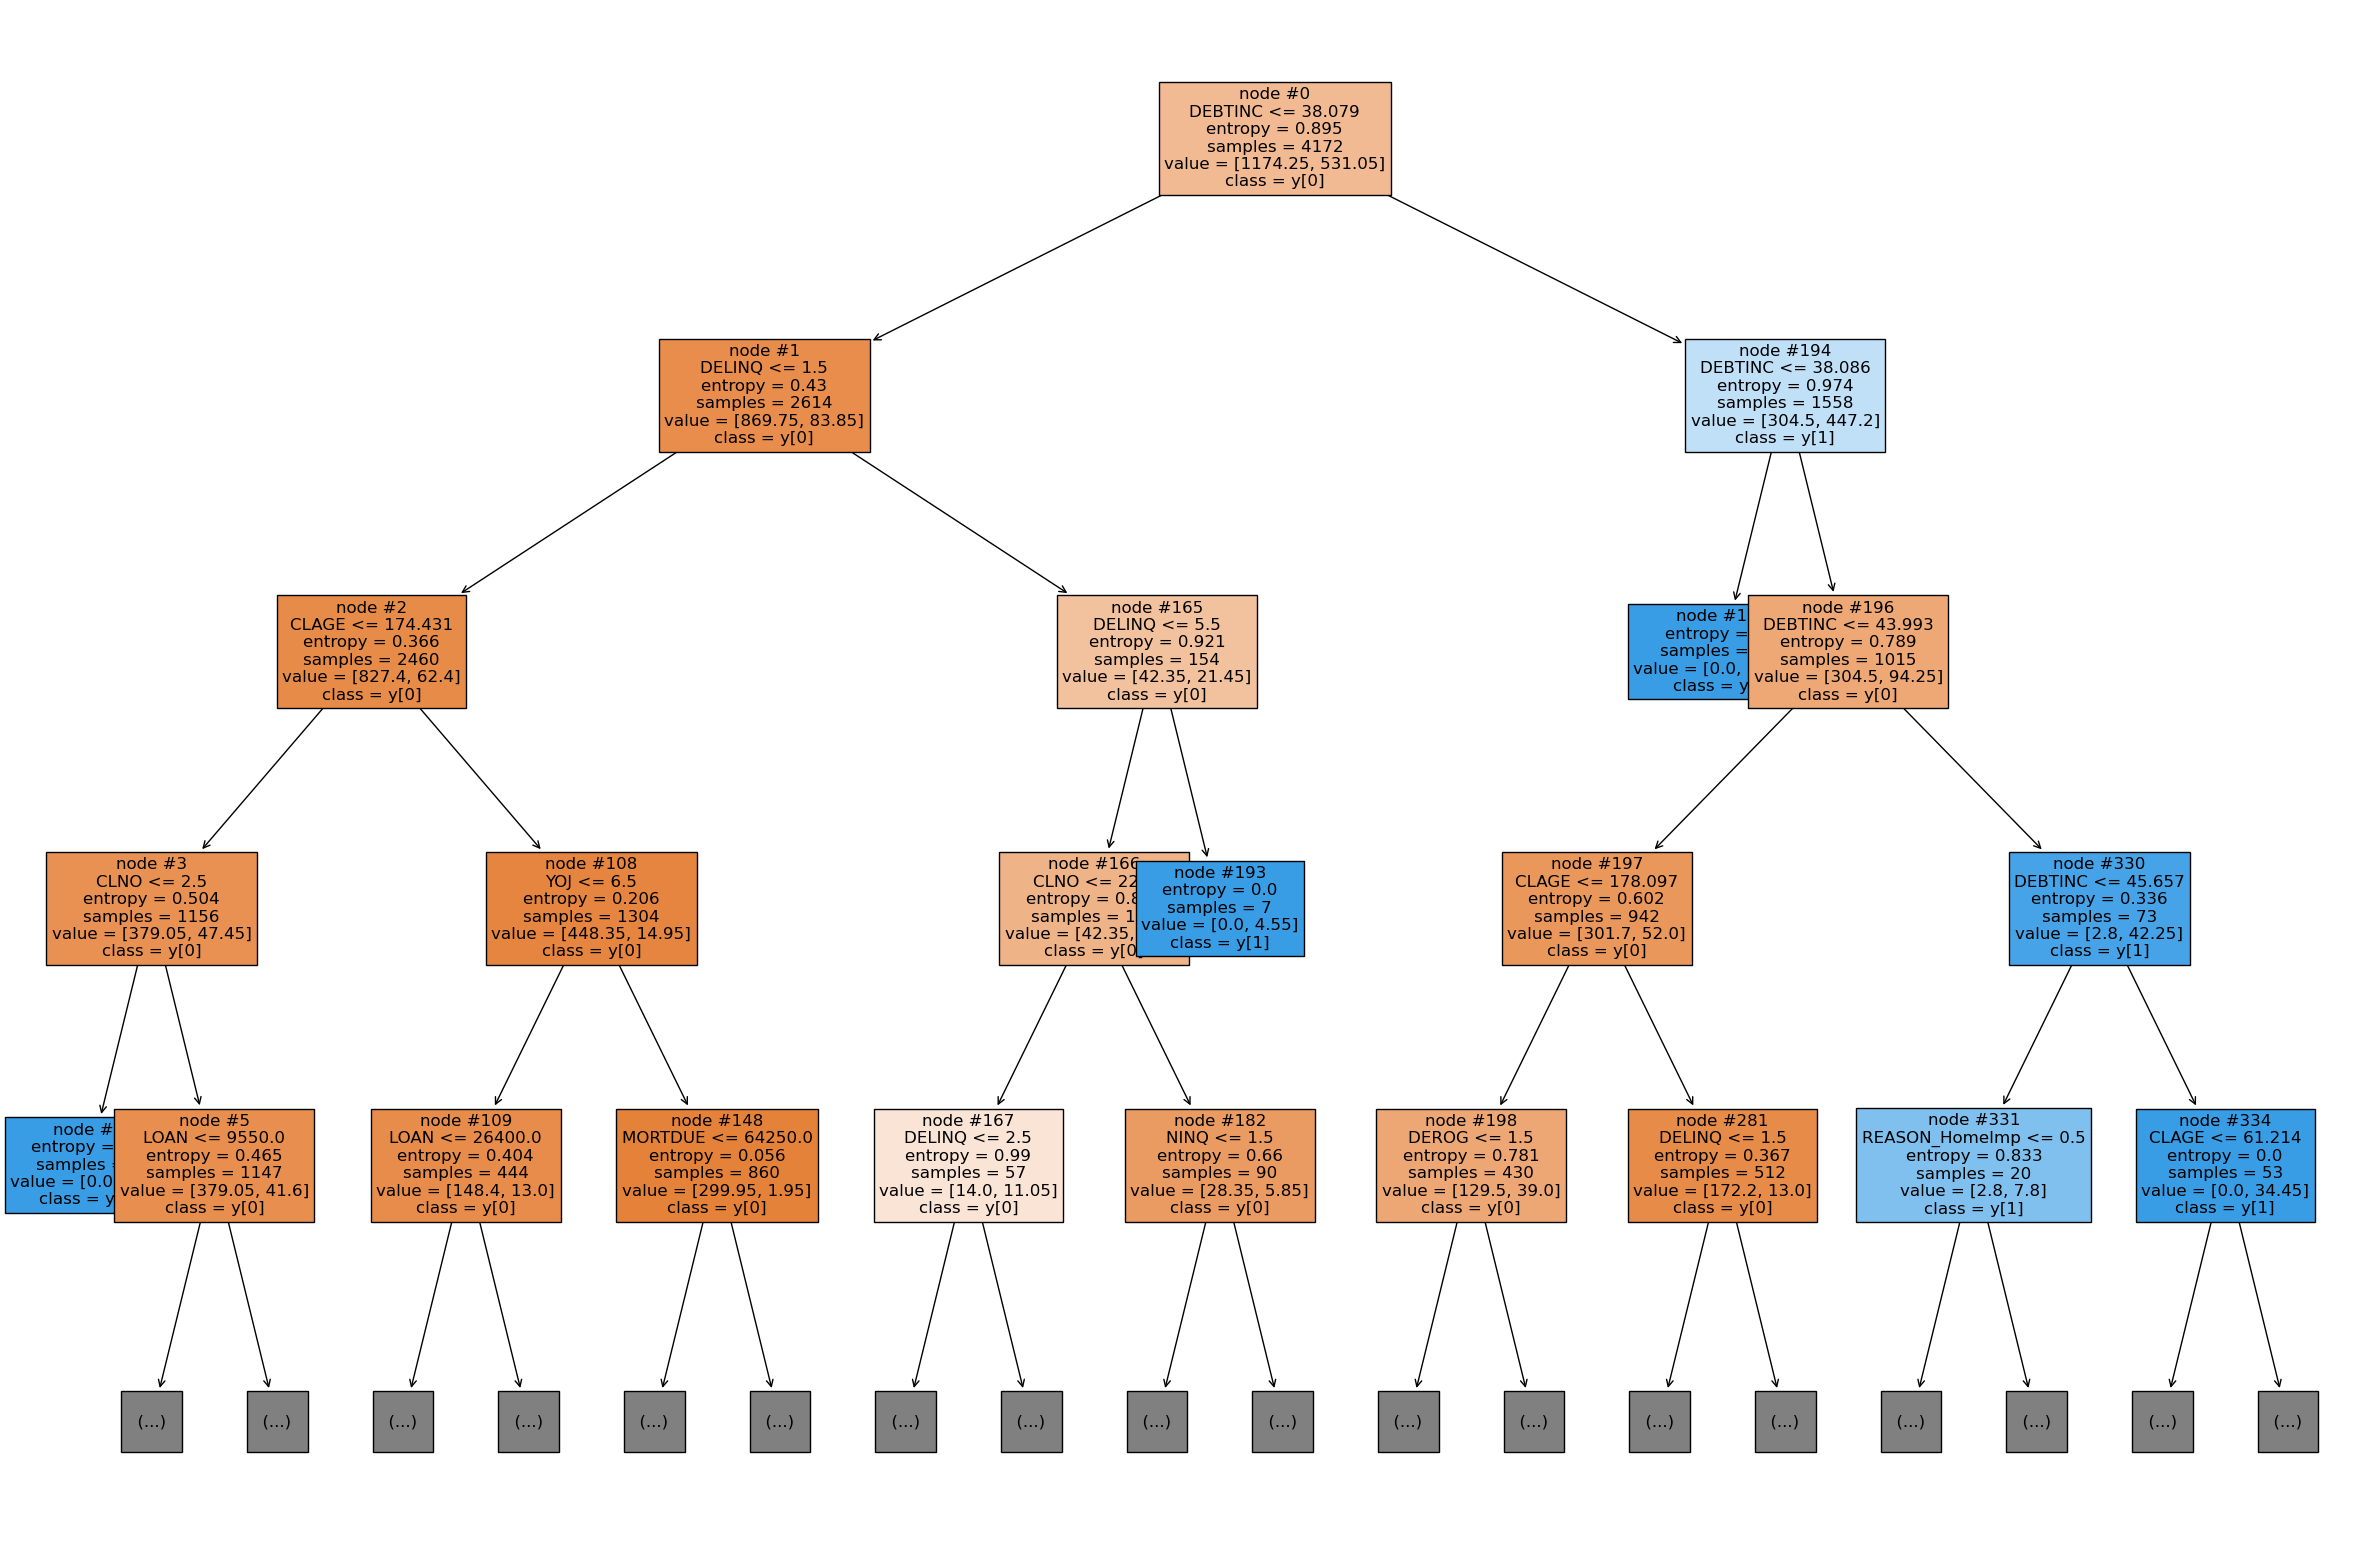

In [170]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt_rs,max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

**Observations:**
- The root node for the tuned decision tree is the debt-to-income ratio.
- Borrowers with a debt-to-income ratio above 38.1% are more likely to default on the loan.

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [171]:
# Fit the random forest classifier on the training data
rfc = RandomForestClassifier(n_estimators = 100, class_weight = {0:0.34, 1:0.66}, random_state = 4)
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.34, 1: 0.66}, random_state=4)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



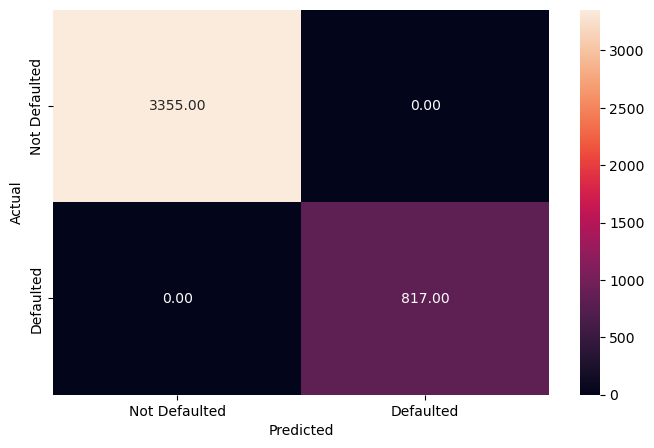

In [172]:
# Checking performance on the training data
y_pred_train_rfc = rfc.predict(X_train)

metrics_score(y_train, y_pred_train_rfc)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1416
           1       0.99      0.81      0.89       372

    accuracy                           0.96      1788
   macro avg       0.97      0.90      0.93      1788
weighted avg       0.96      0.96      0.96      1788



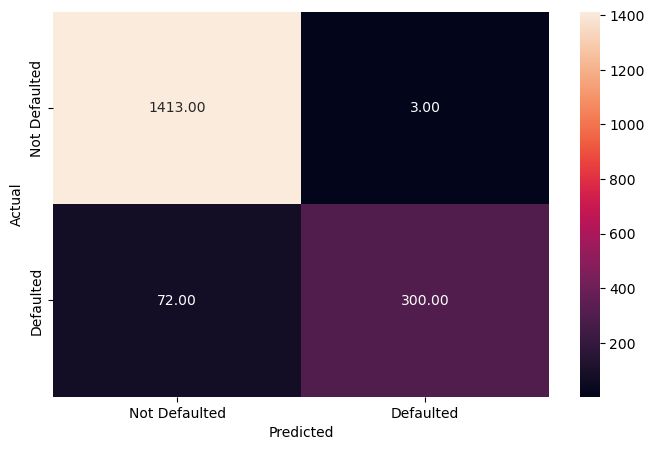

In [173]:
# Checking performance on the test data
y_pred_test_rfc = rfc.predict(X_test)

metrics_score(y_test, y_pred_test_rfc)

In [174]:
rfc_test = model_performance_classification(rfc,X_test,y_test)
rfc_test

Precision    Recall  Accuracy  f1-Score  fBeta-Score
0   0.990099  0.806452  0.958054  0.888889     0.821693

**Observations on Decision Tree Classifiers:**
- The random forest model with default parameters does not perform as well as the tuned decision tree model.
- The random forest model correctly identifies only 78% of the defaulting loans in the test data compared to 86% in the tuned decision tree.
- The precision of the random forest is excellent.

### **Random Forest Classifier Hyperparameter Tuning**

In [175]:
# Choose type of classifier
rf_tuned = RandomForestClassifier(random_state = 1)

# Create grid of parameters to test
parameters_rf = {'max_depth': [8,13,18],
                 'n_estimators': [50,100],
                 'class_weight': ['balanced_subsample',{0: 0.2, 1: 0.8}],
                 'criterion': ['gini','entropy'],
                'min_samples_leaf': [10,25,35],
                'max_features': ['sqrt',0.8],
                }

# Type of scoring
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters_rf, scoring=scorer, cv = 5, n_jobs=-1)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

rf_tuned.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_depth=8, max_features='sqrt', min_samples_leaf=35,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      3355
           1       0.77      0.85      0.81       817

    accuracy                           0.92      4172
   macro avg       0.87      0.90      0.88      4172
weighted avg       0.93      0.92      0.92      4172



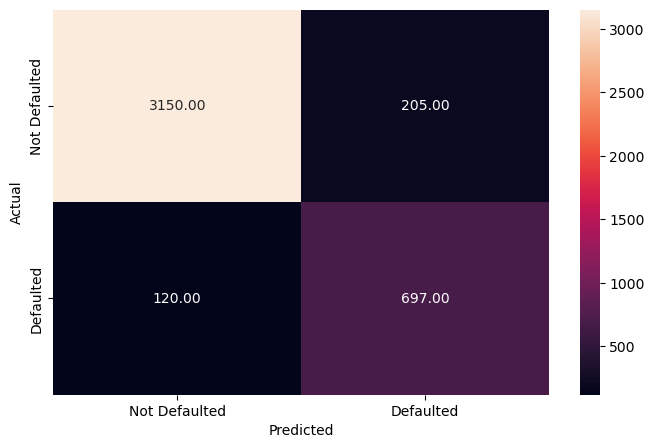

In [176]:
y_pred_train_rf_tuned = rf_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1416
           1       0.76      0.79      0.77       372

    accuracy                           0.90      1788
   macro avg       0.85      0.86      0.86      1788
weighted avg       0.91      0.90      0.91      1788



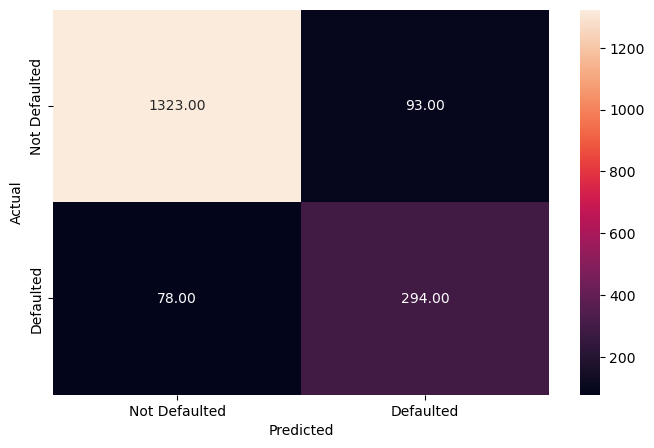

In [177]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

In [178]:
rf_tuned_test = model_performance_classification(rf_tuned,X_test,y_test)
rf_tuned_test

Precision    Recall  Accuracy  f1-Score  fBeta-Score
0    0.75969  0.790323  0.904362  0.774704     0.787149

In [179]:
from sklearn.model_selection import RandomizedSearchCV

rf_rs = RandomForestClassifier(random_state = 1)

# Create grid of parameters to test
parameters_rs = {'max_depth': np.arange(4,18),
                                   'n_estimators': [50,100],
                                   'class_weight': ['balanced_subsample',{0: 0.35, 1: 0.65}],
                                   'criterion': ['gini','entropy'],
                                   'min_samples_leaf': np.arange(4,25,1),
                                   'max_features': np.arange(.1,1,.1)}

# Type of scoring
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_rs = RandomizedSearchCV(rf_rs, parameters_rs, n_iter=50, scoring=scorer, cv = 5, n_jobs=-1, random_state=3)

grid_rs = grid_rs.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_rs = grid_rs.best_estimator_

rf_rs.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=17,
                       max_features=0.1, min_samples_leaf=10, n_estimators=50,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      3355
           1       0.77      0.92      0.84       817

    accuracy                           0.93      4172
   macro avg       0.87      0.93      0.90      4172
weighted avg       0.94      0.93      0.93      4172



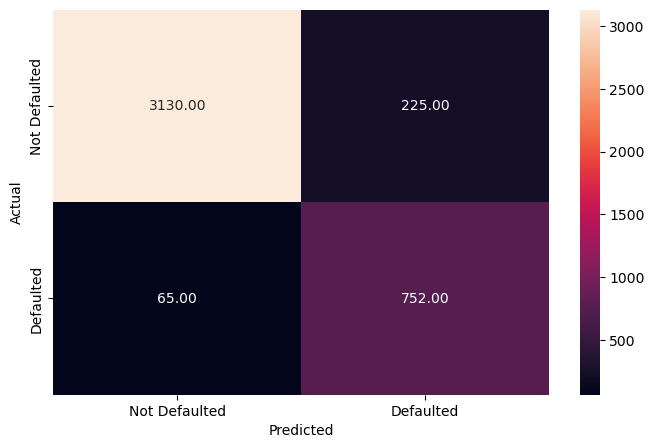

In [180]:
# Checking performance on the test data
y_pred_train_rf_rs = rf_rs.predict(X_train)

metrics_score(y_train, y_pred_train_rf_rs)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1416
           1       0.75      0.83      0.78       372

    accuracy                           0.90      1788
   macro avg       0.85      0.88      0.86      1788
weighted avg       0.91      0.90      0.91      1788



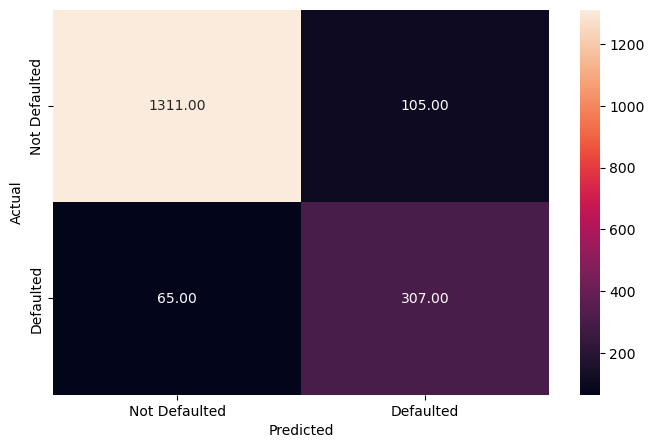

In [181]:
# Checking performance on the test data
y_pred_test_rf_rs = rf_rs.predict(X_test)

metrics_score(y_test, y_pred_test_rf_rs)

In [182]:
rf_rs_test = model_performance_classification(rf_rs,X_test,y_test)
rf_rs_test

Precision    Recall  Accuracy  f1-Score  fBeta-Score
0   0.745146  0.825269  0.904922  0.783163     0.816489

<AxesSubplot:xlabel='Importance'>

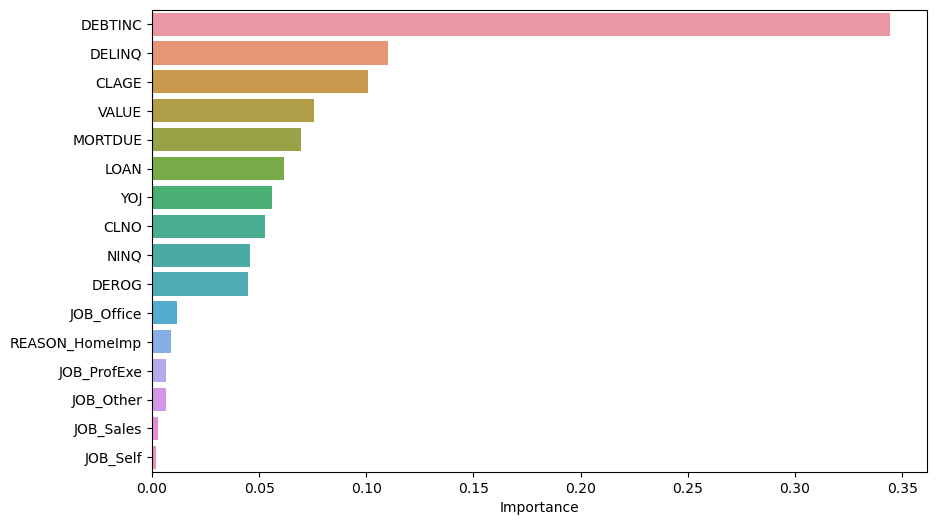

In [183]:
# Plot the feature importance

importances = rf_rs.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (10, 6))

sns.barplot(x = importance_df.Importance, y=importance_df.index)

**Observations on Random Forest Classifiers:**

- The random forest models do not perform as well as the single decision tree models with the highest recall at 83%.
- The precision and recall are more balanced on the tuned random forest classifier than they were on the decision tree classifiers.


## Boosting

In [184]:
# !pip install xgboost

In [185]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# Importing the XGBClassifier from the xgboost library
from xgboost import XGBClassifier

In [186]:
# Define base estimator as random forest with specific class weights
rfc = RandomForestClassifier(class_weight = {0: 0.2, 1: 0.8})

# Adaboost Classifier
adaboost_model = AdaBoostClassifier(base_estimator=rfc,random_state = 1)

# Fit the model
adaboost_model.fit(X_train, y_train)

# Check model performance on the test data
adaboost_model_test = model_performance_classification(adaboost_model, X_test, y_test)

adaboost_model_test

Precision    Recall  Accuracy  f1-Score  fBeta-Score
0   0.989899  0.790323  0.954698  0.878924     0.806584

In [187]:
# Adaboost Tuned
ab_tuned = AdaBoostClassifier(base_estimator=rfc,random_state=1)

parameters_ab = {'max_depth': np.arange(2,8),
                                'criterion': ['gini','entropy'],
                                'min_samples_leaf': [5,10,15,20],
                 'n_estimators': [50,100,200,500,1000],
                 'learning_rate': [0.2,0.5,1]
                }

# Fit the model
ab_tuned.fit(X_train,y_train)

# Check model performance on test data
ab_tuned_test=model_performance_classification(ab_tuned,X_test,y_test)

ab_tuned_test

Precision    Recall  Accuracy  f1-Score  fBeta-Score
0   0.989899  0.790323  0.954698  0.878924     0.806584

In [188]:
# Gradient Boost Classifier
gbc = GradientBoostingClassifier(n_estimators=1000, max_depth=4, subsample=0.4, 
                                 learning_rate=0.2, max_leaf_nodes=17, random_state=6)

# Fit the model
gbc.fit(X_train,y_train)

# Check model performance on the test data
gbc_test = model_performance_classification(gbc, X_test, y_test)

gbc_test

Precision   Recall  Accuracy  f1-Score  fBeta-Score
0   0.936937  0.83871  0.954698  0.885106     0.847596

<AxesSubplot:xlabel='Importance'>

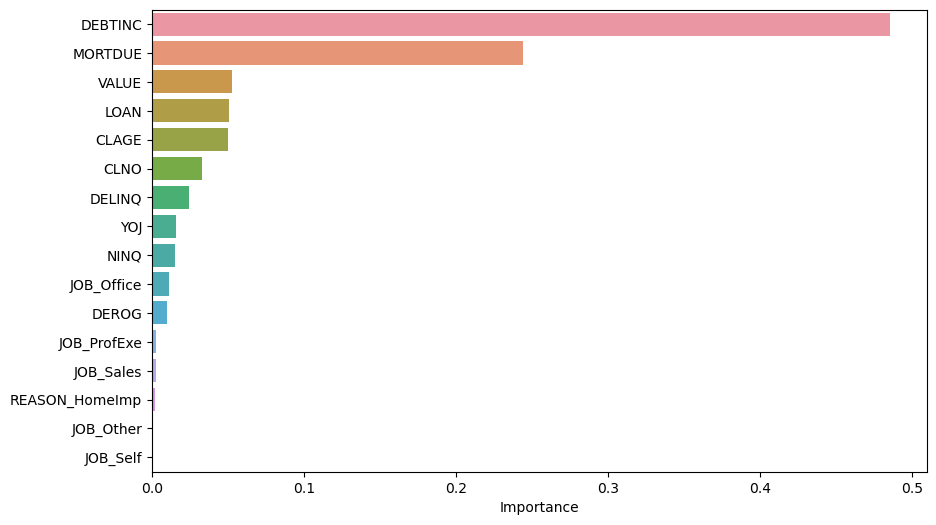

In [189]:
# Plot the feature importance

importances = gbc.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (10, 6))

sns.barplot(x = importance_df.Importance, y=importance_df.index)


In [190]:
# XG Boost Classifier
xgb = XGBClassifier(random_state = 1, eval_metric = 'logloss')

# Fitting the model
xgb.fit(X_train,y_train)

# Model Performance on the test data
xgb_test = model_performance_classification(xgb,X_test,y_test)

xgb_test

Precision    Recall  Accuracy  f1-Score  fBeta-Score
0   0.990066  0.803763  0.957494   0.88724     0.819178

**Observations on Boosting Methods:**
- Adaboost, Gradient Boosting and XGBoost all increased the precision on the model to nearly 100%.
- They also had good recall with the highest found using the Gradient Boosting method, with a recall of 82.5%.
- While this does not quite meet the level of recall for the decision tree classifier, the precision of 98.4% means that the bank is not rejecting customers that are not likely to default.
- While this model is not interpretable, it may be beneficial because it correctly identifies 82.5% of defaulting loans and rejects only 1.6% of customers who are not likely to default.
- Feature importance for the gradient boost model show that the most important variable is the debt-to-income ratio, with an importance of almost 0.8. Other variables have less than 0.05 importance in this model.

In [191]:
models_test_comp_df = pd.concat(
    
    [lg_test.T, dec_tree_test.T, dt_tuned_test.T, dt_rs_test.T, rf_tuned_test.T, rf_rs_test.T, adaboost_model_test.T,ab_tuned_test.T,gbc_test.T,xgb_test.T],
    axis = 1
)

models_test_comp_df.columns = [
    'Logistic Regression',
    'Decision Tree Classifier',
    'Tuned Decision Tree-GS',
    'Tuned Decision Tree-RS',
    'Random Forest Classifier',
    'Random Forest Randomized Search',
    'Adaboost Classifier',
    'Tuned Adaboost Classifier',
    'Gradientboost Classifier',
    'XGBoost Classifier'
]

models_test_comp_df

Logistic Regression  Decision Tree Classifier  \
Precision               0.760000                  0.895044   
Recall                  0.357527                  0.825269   
Accuracy                0.842841                  0.943512   
f1-Score                0.486289                  0.858741   
fBeta-Score             0.377519                  0.831753   

             Tuned Decision Tree-GS  Tuned Decision Tree-RS  \
Precision                  0.816976                0.879310   
Recall                     0.827957                0.822581   
Accuracy                   0.925615                0.939597   
f1-Score                   0.822430                0.850000   
fBeta-Score                0.826846                0.827922   

             Random Forest Classifier  Random Forest Randomized Search  \
Precision                    0.759690                         0.745146   
Recall                       0.790323                         0.825269   
Accuracy                     0.904362                         0.904922   
f1-Score                     0.774704                         0.783163   
fBeta-Score                  0.787149                         0.816489   

             Adaboost Classifier  Tuned Adaboost Classifier  \
Precision               0.989899                   0.989899   
Recall                  0.790323                   0.790323   
Accuracy                0.954698                   0.954698   
f1-Score                0.878924                   0.878924   
fBeta-Score             0.806584                   0.806584   

             Gradientboost Classifier  XGBoost Classifier  
Precision                    0.936937            0.990066  
Recall                       0.838710            0.803763  
Accuracy                     0.954698            0.957494  
f1-Score                     0.885106            0.887240  
fBeta-Score                  0.847596            0.819178

**Model Comparisons:**
- We have trained many different models in order to best predict loans that default.
- For the bank, it is most important to correctly identify loans that will default. This means that we want to maximize our recall, identifying the greatest percentage possible of all defaulting loans. At the same time, we also need to attend to precision so that the bank does not decline loans for eligible borrowers.
- The logistic regression model did not perform well for this data. Recall was only 35.7%, and precision-recall curve shows that precision and recall optimization would only increase this to just under 60%.
- **The base decision tree classifier has a recall of 82.5% and a precision of 89.5%. This model correctly identifies 82.5% of defaulting loans while only declining 10.5% of eligible borrowers. Overall this model has an accuracy of 94.3% meaning that it correctly classified 94.3% of the loans. This tree has a depth of 22, 209 final leaves and a total of 417 nodes.**
- The Tuned Decision Tree Classifier has only a slightly higher recall at 82.8% but drops in precision to 81.7%, meaning that 18.3% of the loans classified as defaulting are actually not likely to default. The bank would be declining loans for many eligible borrowers. Overall this model has an accuracy of 92.6% meaning that it correctly classified only 92.6% of the loans.
- Despite extensive attempts at tuning, the random forest classifiers did not perform as well as the decision tree classifiers. While they achieved similar levels of recall, the highest precision on the random forest classifiers was 76%.
- **We were able to achieve significantly higher levels of precision using boosting methods, however the recall was relatively the same. The exception was the GradientBoosting Classifier which achieved a recall of 83.9% and a precision of 93.7%. Overall accuracy on the GradientBoosting Classifier was 95.5%. This values are strong and this could provide a strong model for the bank to use. They could potentially identify more than 84% of loans likely to default while at the same time declining less than 7% of eligible borrowers. This model lacks interpretability, which may make it less suitable for this use.**


**Insights:**
- **We found that the borrower's debt-to-income ratio is the most important feature in predicting whether or not a loan will default. Regardless of model type, this feature held highest importance.**
- Of much smaller importance and in descending order, are number of credit lines, age of credit line, current value of property, amount due on existing mortgage, number of delinquent credit lines, loan value, and number of major derogatory claims.
- There is very little difference in loan defaults when comparing by reason for the loan.
- Loans were made to borrowers that had multiple major derogatory reports and/or delinquent accounts. 
- Loans were made to borrowers that had very high debt-to-income ratios.
- There are many observations with missing data. Of the observations missing one or more fields, the loan default rate is 34.8%. Of the observations with complete data, the loan default is only 8.9%.
- In the dataset, 46 percent of the observations contained one or more missing values. Model performance could likely be improved with a more complete dataset.


**Proposal for the final solution design:** 
- In order for the bank to reduce number of loan defaults on home equity lines, we propose using the base Decision Tree Model. This model correctly identified 82.5% of defaulting loans while also incorrectly classifying only 10.5% of eligible borrowers. 
- While the Gradient Boosting Classifier has slightly higher recall and precision, the loss of interpretability presents problems for banks when they need to justify declining a loan to individual borrowers.
- Within this historical data, the total value of loans that defaulted was over \\$20 million dollars\. If 82.5% of these risky loans were identified up front, the bank could potentially save  \\$16.5 million dollars. 
- Similarly, if 10.5% of the eligible borrowers are declined due to the model, this could result in a loss of interest that would have been earned on the loans. Assuming a conservative simple 5% interest on the the loan value, estimated losses for these misclassified loans are less than \\$500,000. Considering the gains from identifying BAD loans, this could still net the bank an additional \\$16 million dollars.
- If a less interpretable model is acceptable, the Gradient Boosting Classifier decreases losses over the Decision Tree Model. With 83.9% recall, losses from BAD loans could be reduced by \\$16.8 million dollars while losses due incorrectly declined eligible borrowers would be under \\$300,000, resulting in a net gain of $16.5 million dollars for the bank. 
- We also recommend that the bank strengthen data collection procedures and continue to refine the model with a more complete set of data.

## Executive Summary:

Based on historical data, the bank has lost an estimated \\$20 million due to loan defaults. Through analysis of over 5900 home equity loan applications and their subsequent performance, it is found that the most important predictor of future loan default is the borrower's debt-to-income ratio. Also of importance when predicting loan defaults are the major derogatory reports and delinquent accounts of the borrower. By implementing the recommended decision tree model along with other key recommendations, the bank can make more informed decisions about loan approvals and loan values, ultimately reducing the risk of loan default and potentially saving the bank an estimated \\$16 million of the \\$20 million lost.

Our analysis used a variety of statistical methods, including logistic regression and decision tree analysis, to identify the factors that were most strongly associated with loan defaults. Our results showed that the debt-to-income ratio was consistently the strongest predictor of loan defaults across all of our models. Borrowers with a higher debt-to-income ratio were more likely to default on their loans. Additionally, borrowers with major derogatory reports and delinquent accounts were also more likely to default on their loans. The decision tree model recommended accurately predicted 82.5% of defaulting loans while incorrectly classifying only 10.5% of eligible borrowers as defaulting. Potential bank savings stated above are based on correctly predicting 82.5% of defaulted loan values prior to approving the loan, as well as a small loss of interest on potential loans denied due to incorrect classification. The historical data set contained a large amount of missing data, which limits the scope of findings. Additional data collection and refining of the model is included in recommendations.

These findings have important implications for stakeholders. Consideration and integration of these findings into standard operating procedure will support the bank in making sound decisions regarding home equity loan approvals. Recommendations for implementation include
- Identify debt-to-income ratio as a key factor in underwriting and approving home equity loans.
- Establish a maximum debt-to-income ratio for loan approvals.
- Decline loans to people who have major derogatory reports or delinquent accounts.
- For borrowers with a high debt-to-income ratio, major derogatory reports, or delinquent accounts, provide opportunities for them to re-establish a positive credit record. This could include financial counseling and education, opportunities for smaller loans that result in a more manageable debt-to-income ratio and opportunities to demonstrate financial responsibility through regular deposits into savings.
- Require consistent and complete data from all branches for all loan applications. 
- Provide training to all loan officers regarding new loan application and approval requirements.
- Continue to refine the model as more complete data is gathered under new guidelines.

Overall, our study provides valuable insights into the factors that drive loan defaults and highlights the importance of the debt-to-income ratio in predicting borrower default risk.



